The purpose of this notebook is to evaluate the application's performance for different AI model

In [ ]:
import json

install library

In [ ]:
!pip install transformers
!pip install openai
!pip install google-generativeai
!pip install torch


install dependencies

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import openai
import os
import google.generativeai as genai

In [ ]:
torch.random.manual_seed(0)

In [ ]:
import pandas as pd
import numpy as np

installing models

In [ ]:
pip install --upgrade openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.8/454.8 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.59.4
    Uninstalling openai-1.59.4:
      Successfully uninstalled openai-1.59.4


In [ ]:
import openai
print(openai.__version__)


1.57.4


the below code works for performance test for 1 question

In [ ]:
import time
from openai import OpenAI
import statistics


client = OpenAI(
    api_key="API KEY")


def query_gpt(prompt):
    start_time = time.time()


    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        store=True,
        messages=[{"role": "user", "content": prompt}],
        max_tokens=500
    )

    end_time = time.time()
    response_time = end_time - start_time
    output = completion.choices[0].message.content
    return output, response_time

# Function to test performance
def performance_test(prompt, num_requests=10):
    response_times = []  # Store response times

    for i in range(num_requests):
        print(f"Sending request {i + 1}/{num_requests}...")
        _, response_time = query_gpt(prompt)
        response_times.append(response_time)
        print(f"Request {i + 1} took {response_time:.4f} seconds")

    # Calculate performance metrics
    avg_time = statistics.mean(response_times)
    min_time = min(response_times)
    max_time = max(response_times)
    std_dev = statistics.stdev(response_times)

    # Print performance results
    print("\nPerformance Test Results:")
    print(f"Number of Requests: {num_requests}")
    print(f"Average Response Time: {avg_time:.4f} seconds")
    print(f"Minimum Response Time: {min_time:.4f} seconds")
    print(f"Maximum Response Time: {max_time:.4f} seconds")
    print(f"Standard Deviation: {std_dev:.4f} seconds")


prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

2x + 3 = 11

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{
  "hints": [
    {
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        { "option": "Option A", "explanation": "Reason why Option A is incorrect." },
        { "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." },
        { "option": "Option C", "explanation": "Reason why Option C is incorrect." },
        { "option": "Option D", "explanation": "Reason why Option D is incorrect." }
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}
"""


if __name__ == "__main__":
    num_requests = 10
    performance_test(prompt, num_requests)


Sending request 1/10...
Request 1 took 6.8989 seconds
Sending request 2/10...
Request 2 took 6.0428 seconds
Sending request 3/10...
Request 3 took 5.8289 seconds
Sending request 4/10...
Request 4 took 27.6238 seconds
Sending request 5/10...
Request 5 took 7.1334 seconds
Sending request 6/10...
Request 6 took 26.5921 seconds
Sending request 7/10...
Request 7 took 5.4299 seconds
Sending request 8/10...
Request 8 took 26.1114 seconds
Sending request 9/10...
Request 9 took 26.8215 seconds
Sending request 10/10...
Request 10 took 27.2529 seconds

Performance Test Results:
Number of Requests: 10
Average Response Time: 16.5736 seconds
Minimum Response Time: 5.4299 seconds
Maximum Response Time: 27.6238 seconds
Standard Deviation: 10.8820 seconds


the above test was for 1 questions with 10 itertaion. successful

In [ ]:
import time
import statistics
from openai import OpenAI


client = OpenAI(
    api_key="API key"
)

def query_gpt(prompt):
    start_time = time.time()

    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=500,
        n=1
    )

    end_time = time.time()
    response_time = end_time - start_time
    output = completion.choices[0].message.content
    return output, response_time


def performance_test(prompt, num_requests=10):
    response_times = []

    for i in range(num_requests):
        print(f"Sending request {i + 1}/{num_requests}...")
        response, response_time = query_gpt(prompt)
        response_times.append(response_time)
        print(f"Request {i + 1} took {response_time:.4f} seconds")
        print(f"Response {i + 1}: {response}\n")


    avg_time = statistics.mean(response_times)
    min_time = min(response_times)
    max_time = max(response_times)
    std_dev = statistics.stdev(response_times)


    print("\nPerformance Test Results:")
    print(f"Number of Requests: {num_requests}")
    print(f"Average Response Time: {avg_time:.4f} seconds")
    print(f"Minimum Response Time: {min_time:.4f} seconds")
    print(f"Maximum Response Time: {max_time:.4f} seconds")
    print(f"Standard Deviation: {std_dev:.4f} seconds")

prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

2x + 3 = 11

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{
  "hints": [
    {
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        { "option": "Option A", "explanation": "Reason why Option A is incorrect." },
        { "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." },
        { "option": "Option C", "explanation": "Reason why Option C is incorrect." },
        { "option": "Option D", "explanation": "Reason why Option D is incorrect." }
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}
"""


if __name__ == "__main__":
    num_requests = 10
    performance_test(prompt, num_requests)


Sending request 1/10...
Request 1 took 9.0456 seconds
Response 1: ```json
{
  "hints": [
    {
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        { "option": "A. Subtract 3 from both sides", "explanation": "This option is incorrect because we need to isolate the term with 'x' first." },
        { "option": "B. Add 3 to both sides", "explanation": "This option is incorrect because adding does not help isolate 'x' on one side of the equation." },
        { "option": "C. Subtract 2x from both sides", "explanation": "This option is incorrect because we cannot subtract '2x' from both sides at this point, as it would lead to incorrect simplification." },
        { "option": "D. Subtract 3 from both sides (Correct)", "explanation": "Correct! Subtracting 3 from both sides is the first logical step to isolate the term with 'x'." }
      ],
      "correct_option": "D",
      "updated_equation": "2x = 8"
    },
    {
      "step

testing with set of question

In [ ]:
import time
from openai import OpenAI
import statistics
import json

client = OpenAI(
    api_key=""
)


base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }}
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}}
"""

questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]


def query_gpt(prompt):
    start_time = time.time()
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        store=True,
        messages=[{"role": "user", "content": prompt}],
        max_tokens=500
    )
    end_time = time.time()
    response_time = end_time - start_time
    output = completion.choices[0].message.content
    return output, response_time


def performance_test(questions, num_requests_per_question=3):
    all_results = []

    for idx, question in enumerate(questions):
        print(f"\nTesting Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)
        response_times = []
        responses = []

        for i in range(num_requests_per_question):
            print(f"Request {i + 1}/{num_requests_per_question} for Question {idx + 1}...")
            output, response_time = query_gpt(prompt)
            response_times.append(response_time)
            responses.append(output)
            print(f"Request {i + 1} took {response_time:.4f} seconds")

        # Calculate performance metrics
        avg_time = statistics.mean(response_times)
        min_time = min(response_times)
        max_time = max(response_times)
        std_dev = statistics.stdev(response_times)

        # Store results for this question
        all_results.append({
            "question_number": idx + 1,
            "question": question,
            "average_time": avg_time,
            "min_time": min_time,
            "max_time": max_time,
            "std_dev": std_dev,
            "responses": responses
        })


        print("\nPerformance Results for Question", idx + 1)
        print(f"Average Response Time: {avg_time:.4f} seconds")
        print(f"Minimum Response Time: {min_time:.4f} seconds")
        print(f"Maximum Response Time: {max_time:.4f} seconds")
        print(f"Standard Deviation: {std_dev:.4f} seconds")

        print("\nSample Outputs:")
        for j, response in enumerate(responses, 1):
            print(f"\n--- Response {j} ---")
            print(response)
            print("---------------------")


    with open("performance_results.json", "w") as file:
        json.dump(all_results, file, indent=4)

    print("\nResults saved to performance_results.json")
    return all_results

if __name__ == "__main__":
    num_requests_per_question = 3
    results = performance_test(questions, num_requests_per_question)



Testing Question 1/5...
Request 1/3 for Question 1...
Request 1 took 6.3817 seconds
Request 2/3 for Question 1...
Request 2 took 8.4245 seconds
Request 3/3 for Question 1...
Request 3 took 8.0079 seconds

Performance Results for Question 1
Average Response Time: 7.6047 seconds
Minimum Response Time: 6.3817 seconds
Maximum Response Time: 8.4245 seconds
Standard Deviation: 1.0794 seconds

Sample Outputs:

--- Response 1 ---
{
  "hints": [
    {
      "step": 1,
      "hint_question": "What is the first step to simplify the equation 2x + 3 = 11?",
      "options": [
        { "option": "Option A: Add 3 to both sides.", "explanation": "This would not isolate the variable. Instead, it would complicate the equation." },
        { "option": "Option B (Correct): Subtract 3 from both sides.", "explanation": "Correct! Subtracting 3 from both sides helps isolate the term with the variable." },
        { "option": "Option C: Multiply both sides by 2.", "explanation": "Multiplying by 2 would chang

with 1 response per question

In [2]:
import time
from openai import OpenAI
import statistics
import json


client = OpenAI(
    api_key=""
)


base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }}
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}}
"""


questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]


def query_gpt(prompt):
    start_time = time.time()
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        store=True,
        messages=[{"role": "user", "content": prompt}],
        max_tokens=500
    )
    end_time = time.time()
    response_time = end_time - start_time
    output = completion.choices[0].message.content
    return output, response_time


def performance_test(questions, num_requests_per_question=3):
    all_results = []

    for idx, question in enumerate(questions):
        print(f"\nTesting Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)
        response_times = []
        responses = []

        for i in range(num_requests_per_question):
            print(f"Request {i + 1}/{num_requests_per_question} for Question {idx + 1}...")
            output, response_time = query_gpt(prompt)
            response_times.append(response_time)
            responses.append(output)
            print(f"Request {i + 1} took {response_time:.4f} seconds")


        avg_time = statistics.mean(response_times)
        min_time = min(response_times)
        max_time = max(response_times)
        std_dev = statistics.stdev(response_times)


        all_results.append({
            "question_number": idx + 1,
            "question": question,
            "average_time": avg_time,
            "min_time": min_time,
            "max_time": max_time,
            "std_dev": std_dev,
            "responses": responses
        })

      s
        print("\nPerformance Results for Question", idx + 1)
        print(f"Average Response Time: {avg_time:.4f} seconds")
        print(f"Minimum Response Time: {min_time:.4f} seconds")
        print(f"Maximum Response Time: {max_time:.4f} seconds")
        print(f"Standard Deviation: {std_dev:.4f} seconds")

        print("\nSample Outputs:")
        for j, response in enumerate(responses, 1):
            print(f"\n--- Response {j} ---")
            print(response)
            print("---------------------")


    with open("performance_results.json", "w") as file:
        json.dump(all_results, file, indent=4)

    print("\nResults saved to performance_results.json")
    return all_results


if __name__ == "__main__":
    num_requests_per_question = 3
    results = performance_test(questions, num_requests_per_question)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 106)

with cost

In [ ]:
pip install pandas


In [ ]:
import time
import psutil
from openai import OpenAI
import pandas as pd
import json
import statistics

client = OpenAI(
    api_key="")

base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }}
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}}
"""


questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]


def calculate_tokens(prompt, response):
    return len(prompt.split()) + len(response.split())


def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  
    return cpu_usage, memory_usage


def query_gpt(prompt):
    start_time = time.time()
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        store=True,
        messages=[{"role": "user", "content": prompt}],
        max_tokens=500
    )
    end_time = time.time()
    response_time = end_time - start_time
    output = completion.choices[0].message.content
    return output, response_time

expected_solutions = {
    "Solve the equation: 2x + 3 = 11.": "x = 4",
    "Simplify the expression: 3(2x + 5) = 21.": "x = 2",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.": "(x + 2)(x + 3) = 0",
    "Solve the inequality: 3x - 7 > 5.": "x > 4",
    "Find the slope and intercept of the line: y = 2x + 3.": "Slope = 2, Intercept = 3"
}

def evaluate_accuracy(response, question):
    expected = expected_solutions.get(question, None)
    if not expected:
        return "No expected solution available"

    if expected in response:
        return "Correct"
    else:
        return "Incorrect"

PRICING = {
    "input": 2.50 / 1_000_000,
    "cached_input": 1.25 / 1_000_000,
    "output": 10.00 / 1_000_000,
}


def calculate_cost(token_count_input, token_count_output):

    input_cost = token_count_input * PRICING["input"]


    output_cost = token_count_output * PRICING["output"]


    total_cost = input_cost + output_cost

    return total_cost

def calculate_token_counts(prompt, response):

    token_count_input = len(prompt.split())
    token_count_output = len(response.split())

    return token_count_input, token_count_output


def performance_test(questions):
    results = []
    response_times = []
    costs = []
    cpu_usages = []
    memory_usages = []
    token_counts_input = []
    token_counts_output = []

    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)

        # Query GPT
        response, response_time = query_gpt(prompt)

        # Measure token count for both input and output
        token_count_input, token_count_output = calculate_token_counts(prompt, response)

        # Calculate cost
        cost = calculate_cost(token_count_input, token_count_output)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Evaluate accuracy
        accuracy = evaluate_accuracy(response, question)

        # Append metrics to respective lists
        response_times.append(response_time)
        costs.append(cost)
        cpu_usages.append(cpu_usage)
        memory_usages.append(memory_usage)
        token_counts_input.append(token_count_input)
        token_counts_output.append(token_count_output)

        # Store result for this question
        result = {
            "question_number": idx + 1,
            "question": question,
            "response_time": response_time,
            "response": response,
            "token_count_input": token_count_input,
            "token_count_output": token_count_output,
            "cost": cost,
            "cpu_usage": cpu_usage,
            "memory_usage": memory_usage,
            "accuracy": accuracy
        }
        results.append(result)

avg_time = statistics.mean(response_times)
min_time = min(response_time)
    max_time = max(response_times)
    std_dev = statistics.stdev(response_times)
    avg_cost = statistics.mean(costs)
    avg_cpu_usage = statistics.mean(cpu_usages)
    avg_memory_usage = statistics.mean(memory_usages)

        # Print performance results
        print("\nPerformance Results for Question", idx + 1)
        print(f"Average Response Time: {avg_time:.4f} seconds")
        print(f"Average Cost: ${avg_cost:.4f}")
        print(f"Accuracy: {accuracy}")


        # Store result for this question
        result = {
            "question_number": idx + 1,
            "question": question,
            "response_time": response_time,
            "response": response,
            "token_count_input": token_count_input,
            "token_count_output": token_count_output,
            "cost": cost,
            "cpu_usage": cpu_usage,
            "memory_usage": memory_usage,
            "accuracy": accuracy
        }
        results.append(result)

        # Print performance and cost results for this question
        print(f"Question {idx + 1}: {question}")
        print(f"Response Time: {response_time:.4f} seconds")
        print(f"Input Token Count: {token_count_input}")
        print(f"Output Token Count: {token_count_output}")
        print(f"Cost: ${cost:.4f}")
        print(f"CPU Usage: {cpu_usage:.2f}%")
        print(f"Memory Usage: {memory_usage:.2f} MB")
        print(f"Accuracy: {accuracy}")
        print("\nResponse:")
        #print(response)
        print("-" * 50)

        df_gpt4_fewshot = pd.DataFrame(results)
        print("\nPerformance Results Table with base prompt:")
        print(df_gpt4_fewshot)

    # Save results to JSON
    file_name = "performance_with_costanalysis_diagram.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)

    print(f"\nResults saved to {file_name}")
    return results

# Run performance test with cost analysis
if __name__ == "__main__":
    results = performance_test(questions)



Processing Question 1/5...


TypeError: 'float' object is not iterable

In [ ]:
import time
import psutil
from openai import OpenAI
import pandas as pd
import json
import statistics

# Initialize OpenAI client
client = OpenAI(
    api_key="")
)

# Base prompt template
base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }}
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}}
"""

# Set of algebraic questions
questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]

# Expected solutions for accuracy evaluation
expected_solutions = {
    "Solve the equation: 2x + 3 = 11.": "x = 4",
    "Simplify the expression: 3(2x + 5) = 21.": "x = 2",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.": "(x + 2)(x + 3) = 0",
    "Solve the inequality: 3x - 7 > 5.": "x > 4",
    "Find the slope and intercept of the line: y = 2x + 3.": "Slope = 2, Intercept = 3"
}

# Pricing structure (in dollars per million tokens)
PRICING = {
    "input": 2.50 / 1_000_000,
    "output": 10.00 / 1_000_000
}

# Helper functions
def calculate_tokens(text):
    """Calculate token count based on word count approximation."""
    return len(text.split())

def calculate_cost(token_count_input, token_count_output):
    """Calculate cost based on token usage."""
    input_cost = token_count_input * PRICING["input"]
    output_cost = token_count_output * PRICING["output"]
    return input_cost + output_cost

def measure_system_usage():
    """Measure CPU and memory usage."""
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024) 
    return cpu_usage, memory_usage

def evaluate_accuracy(response, question):
    """Evaluate response accuracy based on expected solutions."""
    expected = expected_solutions.get(question, "")
    return "Correct" if expected in response else "Incorrect"

def query_gpt(prompt):
    """Query GPT model and measure response time."""
    start_time = time.time()
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        store=True,
        messages=[{"role": "user", "content": prompt}],
        max_tokens=500
    )
    end_time = time.time()
    response_time = end_time - start_time
    output = completion.choices[0].message.content
    return output, response_time

def performance_test(questions):
    """Run performance test for a list of questions."""
    results = []

    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)

        # Query GPT
        response, response_time = query_gpt(prompt)

        # Measure token usage
        token_count_input = calculate_tokens(prompt)
        token_count_output = calculate_tokens(response)

        # Calculate cost
        cost = calculate_cost(token_count_input, token_count_output)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Evaluate accuracy
        accuracy = evaluate_accuracy(response, question)

        # Store result
        result = {
            "question_number": idx + 1,
            "question": question,
            "response_time": response_time,
            "response": response,
            "token_count_input": token_count_input,
            "token_count_output": token_count_output,
            "cost": cost,
            "cpu_usage": cpu_usage,
            "memory_usage": memory_usage,
            "accuracy": accuracy
        }
        results.append(result)

        # Print summary for the question
        print(f"Response Time: {response_time:.4f} seconds, Cost: ${cost:.4f}, Accuracy: {accuracy}")
        print("-" * 50)

    # Save results to JSON
    with open("performance_results.json", "w") as file:
        json.dump(results, file, indent=4)

    print("\nResults saved to 'performance_results_cost_gpt4.json'")
    return results

# Run performance test
if __name__ == "__main__":
    performance_test(questions)


In [ ]:
import time
import psutil
from openai import OpenAI
import pandas as pd
import json
import statistics

# Initialize the OpenAI client
client = OpenAI(
    api_key=""
)

# Base prompt template
base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }}
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}}
"""

# Set of algebraic questions
questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]

# Function to calculate token usage
def calculate_tokens(prompt, response):
    return len(prompt.split()), len(response.split())

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

# Function to query GPT
def query_gpt(prompt):
    start_time = time.time()
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        store=True,
        messages=[{"role": "user", "content": prompt}],
        max_tokens=500
    )
    end_time = time.time()
    response_time = end_time - start_time
    output = completion.choices[0].message.content
    return output, response_time

# Define pricing structure
PRICING = {
    "input": 2.50 / 1_000_000,  # $2.50 per million input tokens
    "output": 10.00 / 1_000_000,  # $10.00 per million output tokens
}

# Function to calculate cost
def calculate_cost(token_count_input, token_count_output):
    input_cost = token_count_input * PRICING["input"]
    output_cost = token_count_output * PRICING["output"]
    return input_cost + output_cost

# Performance test function
def performance_test(questions):
    results = []
    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)

        # Query GPT
        response, response_time = query_gpt(prompt)

        # Calculate tokens
        token_count_input, token_count_output = calculate_tokens(prompt, response)

        # Calculate cost
        cost = calculate_cost(token_count_input, token_count_output)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Store result
        results.append({
            "Question": question,
            "Response Time (s)": round(response_time, 4),
            "Input Tokens": token_count_input,
            "Output Tokens": token_count_output,
            "Cost ($)": round(cost, 4),
            "CPU Usage (%)": cpu_usage,
            "Memory Usage (MB)": round(memory_usage, 2),
            "Response": response
        })

    # Convert results to a DataFrame
    df_results = pd.DataFrame(results)
    print("\nPerformance Results:")
    print(df_results)

    # Save results to JSON
    file_name = "performance_gpt4_cost_token.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)
    print(f"\nResults saved to {file_name}")
    return df_results

# Run performance test
if __name__ == "__main__":
    performance_test(questions)



Processing Question 1/5...

Processing Question 2/5...

Processing Question 3/5...

Processing Question 4/5...

Processing Question 5/5...

Performance Results:
                                            Question  Response Time (s)  \
0                   Solve the equation: 2x + 3 = 11.             6.4790   
1           Simplify the expression: 3(2x + 5) = 21.            10.0366   
2         Factorize the quadratic: x^2 + 5x + 6 = 0.             6.8076   
3                  Solve the inequality: 3x - 7 > 5.             7.6511   
4  Find the slope and intercept of the line: y = ...            27.1990   

   Input Tokens  Output Tokens  Cost ($)  CPU Usage (%)  Memory Usage (MB)  \
0           153            264    0.0030            0.0            1103.91   
1           153            287    0.0033            0.0            1103.91   
2           155            272    0.0031            0.0            1103.91   
3           153            279    0.0032            5.0            1103.91 

now adding accuracy function

In [ ]:
import time
import psutil
from openai import OpenAI
import pandas as pd
import json


client = OpenAI(
    api_key="")


base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }}
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}}
"""

# Set of algebraic questions
questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]

# Expected solutions
expected_solutions = {
    "Solve the equation: 2x + 3 = 11.": "x = 4",
    "Simplify the expression: 3(2x + 5) = 21.": "x = 1",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.": "(x + 2)(x + 3) = 0",
    "Solve the inequality: 3x - 7 > 5.": "x > 4",
    "Find the slope and intercept of the line: y = 2x + 3.": "Slope = 2, Intercept = 3"
}

# Function to calculate token usage
def calculate_tokens(prompt, response):
    return len(prompt.split()), len(response.split())

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

# Function to query GPT
def query_gpt(prompt):
    start_time = time.time()
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        store=True,
        messages=[{"role": "user", "content": prompt}],
        max_tokens=500
    )
    end_time = time.time()
    response_time = end_time - start_time
    output = completion.choices[0].message.content
    return output, response_time

# Define pricing structure
PRICING = {
    "input": 2.50 / 1_000_000,  # $2.50 per million input tokens
    "output": 10.00 / 1_000_000,  # $10.00 per million output tokens
}

# Function to calculate cost
def calculate_cost(token_count_input, token_count_output):
    input_cost = token_count_input * PRICING["input"]
    output_cost = token_count_output * PRICING["output"]
    return input_cost + output_cost

# Function to calculate accuracy based on solution comparison
def calculate_accuracy(response, question):
    # Extract the solution from the response
    solution_start = response.lower().find("x =")  # The start of the solution
    if solution_start == -1:
        solution_start = response.lower().find("slope =")  # If not an equation, check for slope
    if solution_start == -1:
        return 0  # No solution found

    solution_end = response.find("\n", solution_start)  # End of the solution
    if solution_end == -1:
        solution_end = len(response)

    extracted_solution = response[solution_start:solution_end].strip()

    # Compare the extracted solution with the expected solution
    expected_solution = expected_solutions.get(question, "").lower()
    if extracted_solution.lower() == expected_solution:
        return 100  # Accurate solution
    return 0  # Incorrect solution

# Performance test function with accuracy based on solution comparison
def performance_test_with_accuracy(questions):
    results = []
    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)

        # Query GPT
        response, response_time = query_gpt(prompt)

        # Calculate tokens
        token_count_input, token_count_output = calculate_tokens(prompt, response)

        # Calculate cost
        cost = calculate_cost(token_count_input, token_count_output)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Calculate accuracy based on solution comparison
        accuracy = calculate_accuracy(response, question)

        # Store result
        results.append({
            "Question": question,
            "Response Time (s)": round(response_time, 4),
            "Input Tokens": token_count_input,
            "Output Tokens": token_count_output,
            "Cost ($)": round(cost, 4),
            "CPU Usage (%)": cpu_usage,
            "Memory Usage (MB)": round(memory_usage, 2),
            "Response": response,
            "Accuracy (%)": accuracy
        })

    # Convert results to a DataFrame
    df_results = pd.DataFrame(results)
    print("\nPerformance Results with Accuracy:")
    print(df_results)

    # Save results to JSON
    file_name = "performance_gpt4_cost_token_accuracy_solution.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)
    print(f"\nResults saved to {file_name}")
    return df_results

# Run performance test with accuracy based on solution comparison
if __name__ == "__main__":
    performance_test_with_accuracy(questions)



Processing Question 1/5...

Processing Question 2/5...

Processing Question 3/5...

Processing Question 4/5...

Processing Question 5/5...

Performance Results with Accuracy:
                                            Question  Response Time (s)  \
0                   Solve the equation: 2x + 3 = 11.             8.1066   
1           Simplify the expression: 3(2x + 5) = 21.             8.4056   
2         Factorize the quadratic: x^2 + 5x + 6 = 0.             8.3002   
3                  Solve the inequality: 3x - 7 > 5.             7.7735   
4  Find the slope and intercept of the line: y = ...            27.0155   

   Input Tokens  Output Tokens  Cost ($)  CPU Usage (%)  Memory Usage (MB)  \
0           224            270    0.0033           10.0            1103.91   
1           224            283    0.0034            0.0            1103.91   
2           226            322    0.0038           72.2            1103.91   
3           224            293    0.0035            0.0      

In [ ]:
import time
import psutil
from openai import OpenAI
import pandas as pd
import json


client = OpenAI(
    api_key="")


base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }}
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}}
"""

# Set of algebraic questions
questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]

# Expected solutions
expected_solutions = {
    "Solve the equation: 2x + 3 = 11.": "x = 4",
    "Simplify the expression: 3(2x + 5) = 21.": "x = 1",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.": "(x + 2)(x + 3) = 0",
    "Solve the inequality: 3x - 7 > 5.": "x > 4",
    "Find the slope and intercept of the line: y = 2x + 3.": "Slope = 2, Intercept = 3"
}

# Function to calculate token usage
def calculate_tokens(prompt, response):
    return len(prompt.split()), len(response.split())

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

# Function to query GPT
def query_gpt(prompt):
    start_time = time.time()
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        store=True,
        messages=[{"role": "user", "content": prompt}],
        max_tokens=500
    )
    end_time = time.time()
    response_time = end_time - start_time
    output = completion.choices[0].message.content
    return output, response_time

# Define pricing structure
PRICING = {
    "input": 2.50 / 1_000_000,  # $2.50 per million input tokens
    "output": 10.00 / 1_000_000,  # $10.00 per million output tokens
}

# Function to calculate cost
def calculate_cost(token_count_input, token_count_output):
    input_cost = token_count_input * PRICING["input"]
    output_cost = token_count_output * PRICING["output"]
    return input_cost + output_cost

# Function to calculate accuracy based on solution comparison
def evaluate_accuracy(response, question):
    # Get the expected solution for this question
    expected = expected_solutions.get(question, None)
    if not expected:
        return "No expected solution available"

    # Check if the expected solution is in the response
    if expected.lower() in response.lower():
        return "Correct"
    else:
        return "Incorrect"

# Performance test function with accuracy based on solution comparison
def performance_test_with_accuracy(questions):
    results = []
    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)

        # Query GPT
        response, response_time = query_gpt(prompt)

        # Calculate tokens
        token_count_input, token_count_output = calculate_tokens(prompt, response)
         # Measure token count
        token_count = calculate_tokens(prompt, response)
        # Calculate cost
        cost = calculate_cost(token_count_input, token_count_output)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Calculate accuracy based on solution comparison
        accuracy = evaluate_accuracy(response, question)

        # Store result
        results.append({
            "question_number": idx + 1,
            "Question": question,
            "Response Time (s)": round(response_time, 4),
            "Input Tokens": token_count_input,
            "Output Tokens": token_count_output,
            "Cost ($)": round(cost, 4),
            "CPU Usage (%)": cpu_usage,
            "Memory Usage (MB)": round(memory_usage, 2),
            "Response": response,
            "Accuracy (%)": accuracy
        })
        print(f"Question {idx + 1}: {question}")
        print(f"Response Time: {response_time:.4f} seconds")
        print(f"Token Count: {token_count}")
        print(f"CPU Usage: {cpu_usage:.2f}%")
        print(f"Memory Usage: {memory_usage:.2f} MB")
        print(f"Accuracy: {accuracy}")
        #print("\nResponse:")
        #print(response)
        print("-" * 50)
    # Convert results to a DataFrame
    df_results = pd.DataFrame(results)
    print("\nPerformance Results with Accuracy:")
    print(df_results)

    # Save results to JSON
    file_name = "performance_gpt4_cost_token_accuracy_solution.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)
    print(f"\nResults saved to {file_name}")
    return df_results

# Run performance test with accuracy based on solution comparison
if __name__ == "__main__":
    performance_test_with_accuracy(questions)



Processing Question 1/5...
Question 1: Solve the equation: 2x + 3 = 11.
Response Time: 6.3975 seconds
Token Count: (224, 271)
CPU Usage: 0.00%
Memory Usage: 1106.56 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 2/5...
Question 2: Simplify the expression: 3(2x + 5) = 21.
Response Time: 6.2868 seconds
Token Count: (224, 274)
CPU Usage: 0.00%
Memory Usage: 1106.56 MB
Accuracy: Incorrect
--------------------------------------------------

Processing Question 3/5...
Question 3: Factorize the quadratic: x^2 + 5x + 6 = 0.
Response Time: 6.3274 seconds
Token Count: (226, 284)
CPU Usage: 0.00%
Memory Usage: 1106.56 MB
Accuracy: Incorrect
--------------------------------------------------

Processing Question 4/5...
Question 4: Solve the inequality: 3x - 7 > 5.
Response Time: 30.3329 seconds
Token Count: (224, 292)
CPU Usage: 0.00%
Memory Usage: 1106.56 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 5/5

the above code works. now testing for 19 questions

In [ ]:
import time
import psutil
from openai import OpenAI
import pandas as pd
import json

# Initialize the OpenAI client
client = OpenAI(
    api_key="")


base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }}
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}}
"""

# Set of algebraic questions
questions = [
    "4x + 3 = 2x + 9",
    "5x² = 3x",
    "50 - x² = 25 - x - x²",
    "x² - 11x - 12 = 0",
    "x² + 10x = 0",
    "3(3x + 5) + 6 = 3",
    "(y + 2)² = y² + 13",
    "8x² - 2x - 3 = 0",
    "3x² + 27x + 42 = 0",
    "2x - 9 = x/4",
    "(a + 2)(a - 4) = (a + 3)²",
    "6x² = x + 2",
    "(x - 3)(x + 5) = -16",
    "(b + 5)² = (b + 1)²",
    "x³ - 6x² + 8x = 0",
    "4x(x + 1) = 3",
    "(2y + 3)² = (y + 1)(y - 3) + 3y²",
    "-2x² = -8x + 6",
    "(5m + 2)² - 1 = (m - 3)(m + 5) + 24m²"
]

# Expected solutions
expected_solutions = {
    "4x + 3 = 2x + 9": "x = 3",
    "5x² = 3x": "x = 0 or x = 3/5",
    "50 - x² = 25 - x - x²": "x = 25",
    "x² - 11x - 12 = 0": "x = 12 or x = -1",
    "x² + 10x = 0": "x = 0 or x = -10",
    "3(3x + 5) + 6 = 3": "x = -1",
    "(y + 2)² = y² + 13": "y = ±3",
    "8x² - 2x - 3 = 0": "x = 3/4 or x = -1/2",
    "3x² + 27x + 42 = 0": "x = -7 or x = -2",
    "2x - 9 = x/4": "x = 4",
    "(a + 2)(a - 4) = (a + 3)²": "a = 1 or a = -7",
    "6x² = x + 2": "x = 1/3 or x = -2/3",
    "(x - 3)(x + 5) = -16": "x = 1 or x = -9",
    "(b + 5)² = (b + 1)²": "b = -2 or b = -6",
    "x³ - 6x² + 8x = 0": "x = 0, x = 2, or x = 4",
    "4x(x + 1) = 3": "x = 0.5 or x = -3",
    "(2y + 3)² = (y + 1)(y - 3) + 3y²": "y = 0 or y = -1",
    "-2x² = -8x + 6": "x = 1 or x = -3",
    "(5m + 2)² - 1 = (m - 3)(m + 5) + 24m²": "m = -1 or m = 3"
}

# Function to calculate token usage
def calculate_tokens(prompt, response):
    return len(prompt.split()), len(response.split())

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  
    return cpu_usage, memory_usage

# Function to query GPT
def query_gpt(prompt):
    start_time = time.time()
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        store=True,
        messages=[{"role": "user", "content": prompt}],
        max_tokens=500
    )
    end_time = time.time()
    response_time = end_time - start_time
    output = completion.choices[0].message.content
    return output, response_time

# Define pricing structure
PRICING = {
    "input": 2.50 / 1_000_000,  # $2.50 per million input tokens
    "output": 10.00 / 1_000_000,  # $10.00 per million output tokens
}

# Function to calculate cost
def calculate_cost(token_count_input, token_count_output):
    input_cost = token_count_input * PRICING["input"]
    output_cost = token_count_output * PRICING["output"]
    return input_cost + output_cost

# Function to calculate accuracy based on solution comparison
def evaluate_accuracy(response, question):
    # Get the expected solution for this question
    expected = expected_solutions.get(question, None)
    if not expected:
        return "No expected solution available"

    # Check if the expected solution is in the response
    if expected.lower() in response.lower():
        return "Correct"
    else:
        return "Incorrect"

# Performance test function with accuracy based on solution comparison
def performance_test_with_accuracy(questions):
    results = []
    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)

        # Query GPT
        response, response_time = query_gpt(prompt)

        # Calculate tokens
        token_count_input, token_count_output = calculate_tokens(prompt, response)
         # Measure token count
        token_count = calculate_tokens(prompt, response)
        # Calculate cost
        cost = calculate_cost(token_count_input, token_count_output)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Calculate accuracy based on solution comparison
        accuracy = evaluate_accuracy(response, question)

        # Store result
        results.append({
            "question_number": idx + 1,
            "Question": question,
            "Response Time (s)": round(response_time, 4),
            "Input Tokens": token_count_input,
            "Output Tokens": token_count_output,
            "Cost ($)": round(cost, 4),
            "CPU Usage (%)": cpu_usage,
            "Memory Usage (MB)": round(memory_usage, 2),
            "Response": response,
            "Accuracy (%)": accuracy
        })
        print(f"Question {idx + 1}: {question}")
        print(f"Response Time: {response_time:.4f} seconds")
        print(f"Token Count: {token_count}")
        print(f"CPU Usage: {cpu_usage:.2f}%")
        print(f"Memory Usage: {memory_usage:.2f} MB")
        print(f"Accuracy: {accuracy}")
        #print("\nResponse:")
        #print(response)
        print("-" * 50)
    # Convert results to a DataFrame
    df_results = pd.DataFrame(results)
    print("\nPerformance Results with Accuracy:")
    print(df_results)

    # Save results to JSON
    file_name = "performance_gpt4_cost_token_accuracy_solution_19.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)
    print(f"\nResults saved to {file_name}")
    return df_results

# Run performance test with accuracy based on solution comparison
if __name__ == "__main__":
    performance_test_with_accuracy(questions)



Processing Question 1/19...
Question 1: 4x + 3 = 2x + 9
Response Time: 6.8638 seconds
Token Count: (223, 284)
CPU Usage: 60.00%
Memory Usage: 1106.56 MB
Accuracy: Incorrect
--------------------------------------------------

Processing Question 2/19...
Question 2: 5x² = 3x
Response Time: 5.4383 seconds
Token Count: (219, 291)
CPU Usage: 0.00%
Memory Usage: 1106.56 MB
Accuracy: Incorrect
--------------------------------------------------

Processing Question 3/19...
Question 3: 50 - x² = 25 - x - x²
Response Time: 7.3661 seconds
Token Count: (225, 302)
CPU Usage: 61.90%
Memory Usage: 1106.56 MB
Accuracy: Incorrect
--------------------------------------------------

Processing Question 4/19...
Question 4: x² - 11x - 12 = 0
Response Time: 26.3045 seconds
Token Count: (223, 316)
CPU Usage: 0.00%
Memory Usage: 1106.56 MB
Accuracy: Incorrect
--------------------------------------------------

Processing Question 5/19...
Question 5: x² + 10x = 0
Response Time: 8.4068 seconds
Token Count: (22

this is for zero shot prompt

In [ ]:
import time
import psutil
from openai import OpenAI
import json

# Initialize OpenAI client
client = OpenAI(
    api_key=""
)

# Zero-shot prompt template
zero_shot_prompt = """
You are an algebra educator specializing in middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze and solve the following algebraic problem:

{question}

Task:
1. Provide a series of multiple-choice hints (MCQs) to guide the student in solving the problem step by step.
2. Each hint should focus on a single logical step of the solution.
3. For each hint, give 4 options:
   - One correct option and three plausible incorrect options.
   - Briefly explain why each option is correct or incorrect to reinforce learning.
4. After each hint, show the updated version of the equation or expression as it progresses.
5. Ensure that the hints encourage active learning and critical thinking—do not give direct answers, but guide the student through the problem-solving process.
"""

# Set of algebraic questions
questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]

# Expected solutions
expected_solutions = {
    "Solve the equation: 2x + 3 = 11.": "x = 4",
    "Simplify the expression: 3(2x + 5) = 21.": "x = 2",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.": "(x + 2)(x + 3) = 0",
    "Solve the inequality: 3x - 7 > 5.": "x > 4",
    "Find the slope and intercept of the line: y = 2x + 3.": "Slope = 2, Intercept = 3"
}

# Function to calculate token usage
def calculate_tokens(prompt, response):
    return len(prompt.split()) + len(response.split())

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

# Function to query GPT model
def query_gpt(prompt):
    start_time = time.time()
    completion = client.chat.completions.create(
        model="gpt-4o-mini",  # Make sure to update the model name if required
        messages=[{"role": "user", "content": prompt}],
        max_tokens=500
    )
    end_time = time.time()
    response_time = end_time - start_time
    output = completion.choices[0].message.content
    return output, response_time

# Function to evaluate response accuracy
def evaluate_accuracy(response, question):
    # Get the expected solution for this question
    expected = expected_solutions.get(question, None)
    if not expected:
        return "No expected solution available"

    # Check if the expected solution is in the response
    if expected.lower() in response.lower():
        return "Correct"
    else:
        return "Incorrect"

# Function to test performance with the zero-shot prompt
def performance_test(questions):
    results = []

    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = zero_shot_prompt.format(question=question)

        # Query GPT with the zero-shot prompt
        response, response_time = query_gpt(prompt)

        # Measure token count
        token_count = calculate_tokens(prompt, response)

        # Measure system usage (CPU and memory usage)
        cpu_usage, memory_usage = measure_system_usage()

        # Evaluate accuracy
        accuracy = evaluate_accuracy(response, question)

        # Store result for this question
        result = {
            "question_number": idx + 1,
            "question": question,
            "response_time": response_time,
            "response": response,
            "token_count": token_count,
            "cpu_usage": cpu_usage,
            "memory_usage": memory_usage,
            "accuracy": accuracy
        }
        results.append(result)

        # Print performance results for this question
        print(f"Question {idx + 1}: {question}")
        print(f"Response Time: {response_time:.4f} seconds")
        print(f"Token Count: {token_count}")
        print(f"CPU Usage: {cpu_usage:.2f}%")
        print(f"Memory Usage: {memory_usage:.2f} MB")
        print(f"Accuracy: {accuracy}")
        print("\nResponse:")
        print(response)
        print("-" * 50)

    # Save results to JSON
    file_name = "performance_zero_shot.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)

    print(f"\nResults saved to {file_name}")
    return results

# Run performance test (Zero-shot Prompt)
if __name__ == "__main__":
    results_zero_shot = performance_test(questions)



Processing Question 1/5...


AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: your-ope*******-key. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

the above one is successful. now testing with 19 questions

<ipython-input-23-96955ea54351>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Question", y="Response Time (s)", data=df, palette="Set2")


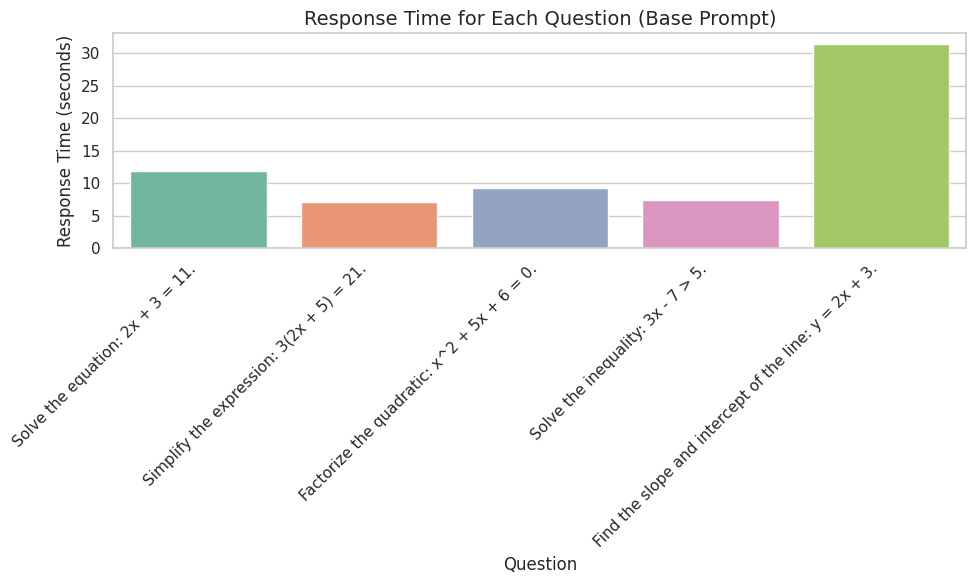

<ipython-input-23-96955ea54351>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Question", y="Cost ($)", data=df, palette="Set3")


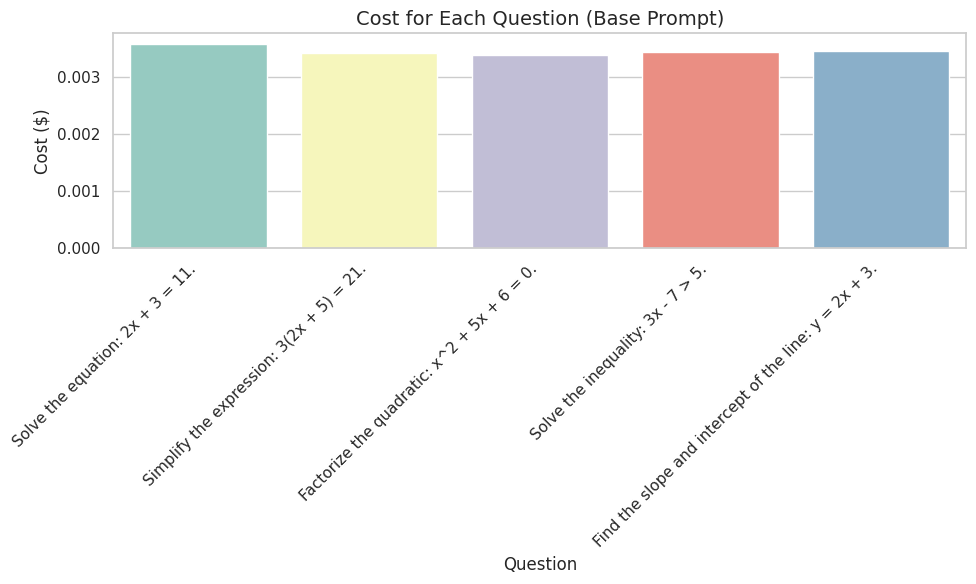

<ipython-input-23-96955ea54351>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Question", y="CPU Usage (%)", data=df, palette="coolwarm")


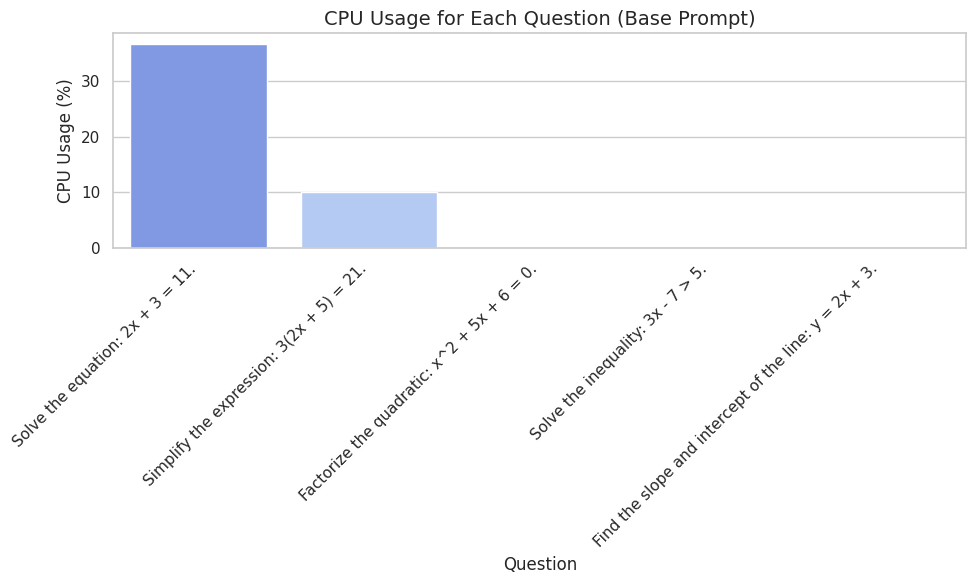

<ipython-input-23-96955ea54351>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Question", y="Memory Usage (MB)", data=df, palette="muted")


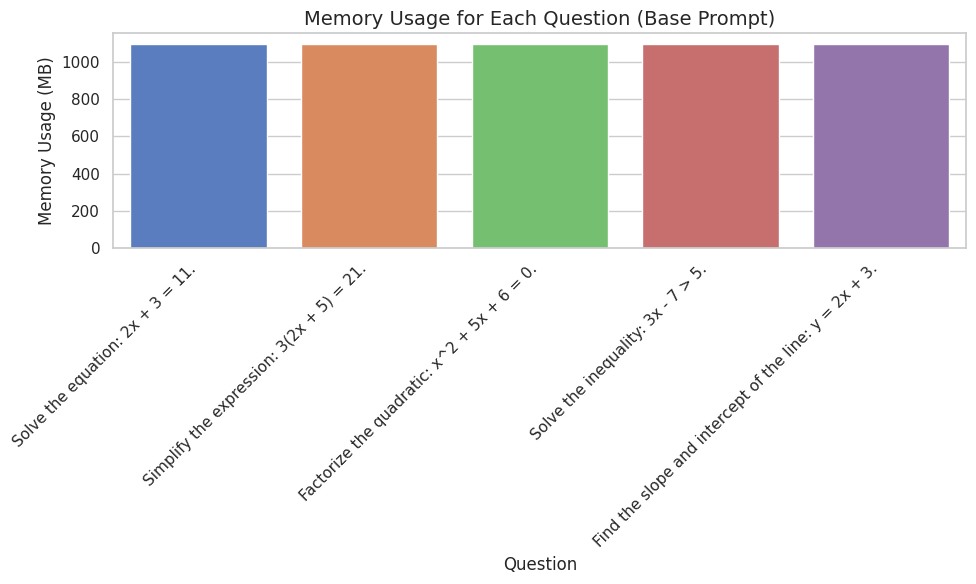

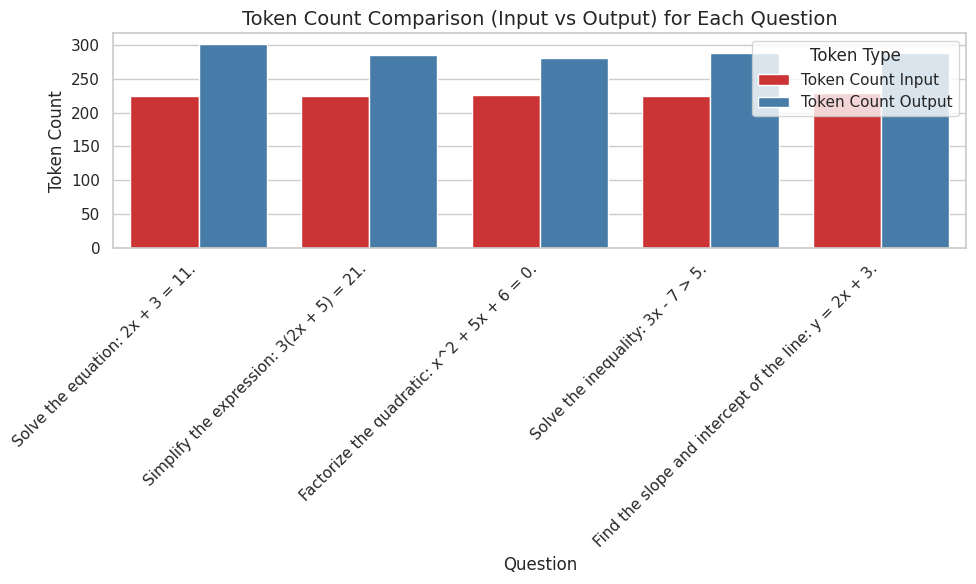

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the JSON file
file_name = '/content/performance_with_cost_analysis_gpt-4_withDiagram.json'
with open(file_name, 'r') as file:
    data = json.load(file)

# Step 2: Extract relevant data
questions = []
response_times = []
costs = []
cpu_usages = []
memory_usages = []
token_counts_input = []
token_counts_output = []

# Loop through each test result and extract the necessary information
for result in data:
    questions.append(result["question"])
    response_times.append(result["response_time"])
    costs.append(result["cost"])
    cpu_usages.append(result["cpu_usage"])
    memory_usages.append(result["memory_usage"])
    token_counts_input.append(result["token_count_input"])
    token_counts_output.append(result["token_count_output"])

# Step 3: Convert to DataFrame
df = pd.DataFrame({
    "Question": questions,
    "Response Time (s)": response_times,
    "Cost ($)": costs,
    "CPU Usage (%)": cpu_usages,
    "Memory Usage (MB)": memory_usages,
    "Token Count Input": token_counts_input,
    "Token Count Output": token_counts_output
})

# Set plot style
sns.set(style="whitegrid")

# Step 4: Visualizations

# 1. Response Time Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Question", y="Response Time (s)", data=df, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title('Response Time for Each Question (Base Prompt)', fontsize=14)
plt.ylabel('Response Time (seconds)', fontsize=12)
plt.xlabel('Question', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Cost Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Question", y="Cost ($)", data=df, palette="Set3")
plt.xticks(rotation=45, ha="right")
plt.title('Cost for Each Question (Base Prompt)', fontsize=14)
plt.ylabel('Cost ($)', fontsize=12)
plt.xlabel('Question', fontsize=12)
plt.tight_layout()
plt.show()

# 3. CPU Usage Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Question", y="CPU Usage (%)", data=df, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title('CPU Usage for Each Question (Base Prompt)', fontsize=14)
plt.ylabel('CPU Usage (%)', fontsize=12)
plt.xlabel('Question', fontsize=12)
plt.tight_layout()
plt.show()

# 4. Memory Usage Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Question", y="Memory Usage (MB)", data=df, palette="muted")
plt.xticks(rotation=45, ha="right")
plt.title('Memory Usage for Each Question (Base Prompt)', fontsize=14)
plt.ylabel('Memory Usage (MB)', fontsize=12)
plt.xlabel('Question', fontsize=12)
plt.tight_layout()
plt.show()

# 5. Token Count Comparison (Input vs Output) for Each Question
df_melted = df.melt(id_vars=["Question"], value_vars=["Token Count Input", "Token Count Output"],
                    var_name="Token Type", value_name="Count")

plt.figure(figsize=(10, 6))
sns.barplot(x="Question", y="Count", hue="Token Type", data=df_melted, palette="Set1")
plt.xticks(rotation=45, ha="right")
plt.title('Token Count Comparison (Input vs Output) for Each Question', fontsize=14)
plt.ylabel('Token Count', fontsize=12)
plt.xlabel('Question', fontsize=12)
plt.tight_layout()
plt.show()


testing with zero- shot prompts

In [ ]:
import time
import psutil
from openai import OpenAI
import json

client = OpenAI(
    api_key=""
)

# Zero-shot prompt template
zero_shot_prompt = """
You are an algebra educator specializing in middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze and solve the following algebraic problem:

{question}

Task:
1. Provide a series of multiple-choice hints (MCQs) to guide the student in solving the problem step by step.
2. Each hint should focus on a single logical step of the solution.
3. For each hint, give 4 options:
   - One correct option and three plausible incorrect options.
   - Briefly explain why each option is correct or incorrect to reinforce learning.
4. After each hint, show the updated version of the equation or expression as it progresses.
5. Ensure that the hints encourage active learning and critical thinking—do not give direct answers, but guide the student through the problem-solving process.
"""

# Set of algebraic questions
questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]

# Function to calculate token usage
def calculate_tokens(prompt, response):
    return len(prompt.split()) + len(response.split())

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

# Function to query GPT
def query_gpt(prompt):
    start_time = time.time()
    completion = client.chat.completions.create(
        model="gpt-4o-mini",  # Update the model to the one you're testing with
        messages=[{"role": "user", "content": prompt}],
        max_tokens=500
    )
    end_time = time.time()
    response_time = end_time - start_time
    output = completion.choices[0].message.content
    return output, response_time

# Dictionary of expected solutions for accuracy evaluation
expected_solutions = {
    "Solve the equation: 2x + 3 = 11.": "x = 4",
    "Simplify the expression: 3(2x + 5) = 21.": "x = 2",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.": "(x + 2)(x + 3) = 0",
    "Solve the inequality: 3x - 7 > 5.": "x > 4",
    "Find the slope and intercept of the line: y = 2x + 3.": "Slope = 2, Intercept = 3"
}

# Function to evaluate response accuracy
def evaluate_accuracy(response, question):
    expected = expected_solutions.get(question, None)
    if not expected:
        return "No expected solution available"

    if expected in response:
        return "Correct"
    else:
        return "Incorrect"

# Function to test performance with the zero-shot prompt
def performance_test(questions):
    results = []

    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = zero_shot_prompt.format(question=question)

        # Query GPT with the zero-shot prompt
        response, response_time = query_gpt(prompt)

        # Measure token count
        token_count = calculate_tokens(prompt, response)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Evaluate accuracy
        accuracy = evaluate_accuracy(response, question)

        # Store result for this question
        result = {
            "question_number": idx + 1,
            "question": question,
            "response_time": response_time,
            "response": response,
            "token_count": token_count,
            "cpu_usage": cpu_usage,
            "memory_usage": memory_usage,
            "accuracy": accuracy
        }
        results.append(result)

        # Print performance results for this question
        print(f"Question {idx + 1}: {question}")
        print(f"Response Time: {response_time:.4f} seconds")
        print(f"Token Count: {token_count}")
        print(f"CPU Usage: {cpu_usage:.2f}%")
        print(f"Memory Usage: {memory_usage:.2f} MB")
        print(f"Accuracy: {accuracy}")
        print("\nResponse:")
        print(response)
        print("-" * 50)

    # Save results to JSON
    file_name = "performance_zero_shot.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)

    print(f"\nResults saved to {file_name}")
    return results

# Run performance test (Zero-shot Prompt)
if __name__ == "__main__":
    results_zero_shot = performance_test(questions)



Processing Question 1/5...
Question 1: Solve the equation: 2x + 3 = 11.
Response Time: 8.0884 seconds
Token Count: 468
CPU Usage: 4.80%
Memory Usage: 1084.57 MB
Accuracy: Correct

Response:
### Problem: Solve the equation: 2x + 3 = 11.

Let's break down the steps to solve the equation using multiple-choice hints.

#### Hint 1: Isolate the term with \( x \).
**What should you do first to start isolating \( x \)?**
A) Subtract 3 from both sides.  
B) Multiply both sides by 3.  
C) Add 3 to both sides.  
D) Divide both sides by 2.  

**Correct Option:** A) Subtract 3 from both sides.  
**Explanation:** To isolate the term involving \( x \), we need to eliminate the constant term (3) on the left side. Subtracting 3 will leave us with just the term containing \( x \).

**Updated equation:**  
\[ 2x = 11 - 3 \]  
\[ 2x = 8 \]

---

#### Hint 2: Simplify the equation.
**What is the next step after isolating the term with \( x \)?**
A) Add 2 to both sides.  
B) Divide both sides by 2.  
C) Su

for gemini 1 question 10 iteration

for gemini ai  set of questions. successful

In [ ]:

import time
import google.generativeai as genai
import statistics
import json
import psutil
import tiktoken

# Initialize Gemini client
genai.configure(api_key="")



# Initialize the Gemini client
def initialize_gemini():
    # Initialize the model (ensure 'gemini-1.5-flash' is the correct model name)
    return genai.GenerativeModel("gemini-1.5-flash")
# Base prompt template
base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }}
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}}
"""

# Set of algebraic questions
questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]

# Function to query Gemini with dynamic prompts
def query_gemini(prompt):
    start_time = time.time()
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    end_time = time.time()
    response_time = end_time - start_time
    output = response.text
    return output, response_time

# Function to test performance across a set of questions
def performance_test(questions, num_requests_per_question=3):
    all_results = []

    for idx, question in enumerate(questions):
        print(f"\nTesting Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)
        response_times = []
        responses = []

        for i in range(num_requests_per_question):
            print(f"Request {i + 1}/{num_requests_per_question} for Question {idx + 1}...")
            output, response_time = query_gemini(prompt)
            response_times.append(response_time)
            responses.append(output)
            print(f"Request {i + 1} took {response_time:.4f} seconds")

        # Calculate performance metrics
        avg_time = statistics.mean(response_times)
        min_time = min(response_times)
        max_time = max(response_times)
        std_dev = statistics.stdev(response_times)

        # Store results for this question
        all_results.append({
            "question_number": idx + 1,
            "question": question,
            "average_time": avg_time,
            "min_time": min_time,
            "max_time": max_time,
            "std_dev": std_dev,
            "responses": responses
        })

        # Print performance results
        print("\nPerformance Results for Question", idx + 1)
        print(f"Average Response Time: {avg_time:.4f} seconds")
        print(f"Minimum Response Time: {min_time:.4f} seconds")
        print(f"Maximum Response Time: {max_time:.4f} seconds")
        print(f"Standard Deviation: {std_dev:.4f} seconds")

        # Print sample outputs for this question
        print("\nSample Outputs:")
        for j, response in enumerate(responses, 1):
            print(f"\n--- Response {j} ---")
            print(response)
            print("---------------------")

    # Save results to JSON
    with open("performance_results.json", "w") as file:
        json.dump(all_results, file, indent=4)

    print("\nResults saved to performance_results_gemini.json")
    return all_results

# Run performance test
if __name__ == "__main__":
    num_requests_per_question = 3
    results = performance_test(questions, num_requests_per_question)



Testing Question 1/5...
Request 1/3 for Question 1...
Request 1 took 5.7876 seconds
Request 2/3 for Question 1...
Request 2 took 4.7635 seconds
Request 3/3 for Question 1...
Request 3 took 4.8749 seconds

Performance Results for Question 1
Average Response Time: 5.1420 seconds
Minimum Response Time: 4.7635 seconds
Maximum Response Time: 5.7876 seconds
Standard Deviation: 0.5619 seconds

Sample Outputs:

--- Response 1 ---
```json
{
  "hints": [
    {
      "step": 1,
      "hint_question": "What is the first step to isolate the term with 'x' in the equation 2x + 3 = 11?",
      "options": [
        {
          "option": "A) Multiply both sides by 2",
          "explanation": "Incorrect. Multiplying by 2 would make the equation more complex, not simpler. We need to isolate 'x', not multiply it."
        },
        {
          "option": "B) Subtract 3 from both sides",
          "explanation": "Correct.  Subtracting 3 from both sides maintains the equality and moves the constant term to

In [ ]:
for gemini token count

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.2 MB/s eta 0:00:00


below code is successful

In [ ]:
import time
import google.generativeai as genai
import statistics
import json
import psutil
import tiktoken

# Initialize Gemini client
genai.configure(api_key="")



# Initialize the Gemini client
def initialize_gemini():
    # Initialize the model (ensure 'gemini-1.5-flash' is the correct model name)
    return genai.GenerativeModel("gemini-1.5-flash")

# Base prompt template
base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }}
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}}
"""

# Set of algebraic questions
questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]

# Initialize a tokenizer for the Gemini-like model (similar to OpenAI GPT-3)
encoder = tiktoken.get_encoding("gpt2")  # Adjust if Gemini uses a different encoding method

# Function to calculate token usage
def calculate_tokens(prompt, response):
    # Tokenize both the prompt and the response
    prompt_tokens = len(encoder.encode(prompt))
    response_tokens = len(encoder.encode(response))
    return prompt_tokens, response_tokens


PRICING = {
    "input": 2.50 / 1_000_000,  # $2.50 per million input tokens
    "output": 10.00 / 1_000_000,  # $10.00 per million output tokens
}

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

# Function to query Gemini with dynamic prompts
def query_gemini(prompt):
    start_time = time.time()
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    end_time = time.time()
    response_time = end_time - start_time
    output = response.text
    return output, response_time

# Dictionary of expected solutions for accuracy evaluation
expected_solutions = {
    "Solve the equation: 2x + 3 = 11.": "x = 4",
    "Simplify the expression: 3(2x + 5) = 21.": "x = 1",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.": "(x + 2)(x + 3) = 0",
    "Solve the inequality: 3x - 7 > 5.": "x > 4",
    "Find the slope and intercept of the line: y = 2x + 3.": "Slope = 2, Intercept = 3"
}

# Function to evaluate response accuracy
def evaluate_accuracy(response, question):
    expected = expected_solutions.get(question, None)
    if not expected:
        return "No expected solution available"

    # Simple substring matching for now
    if expected in response:
        return "Correct"
    else:
        return "Incorrect"

# Function to test performance across a set of questions with cost analysis
def performance_test(questions, num_requests_per_question=3):
    all_results = []

    for idx, question in enumerate(questions):
        print(f"\nTesting Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)
        response_times = []
        responses = []
        cpu_usages = []
        memory_usages = []
        token_counts_input = []
        token_counts_output = []
        costs = []

        for i in range(num_requests_per_question):
            print(f"Request {i + 1}/{num_requests_per_question} for Question {idx + 1}...")
            output, response_time = query_gemini(prompt)
            response_times.append(response_time)
            responses.append(output)
            print(f"Response for Question {idx + 1}: {output}")

            # Measure token usage
            token_count_input, token_count_output = calculate_tokens(prompt, output)
            token_counts_input.append(token_count_input)
            token_counts_output.append(token_count_output)

            # Calculate cost
            cost = calculate_cost(token_count_input, token_count_output)
            costs.append(cost)

            # Measure system usage
            cpu_usage, memory_usage = measure_system_usage()
            cpu_usages.append(cpu_usage)
            memory_usages.append(memory_usage)

            print(f"Request {i + 1} took {response_time:.4f} seconds")
            print(f"CPU Usage: {cpu_usage:.2f}%")
            print(f"Memory Usage: {memory_usage:.2f} MB")
            print(f"Cost: ${cost:.4f}")

        # Calculate performance metrics
        avg_time = statistics.mean(response_times)
        min_time = min(response_times)
        max_time = max(response_times)
        std_dev = statistics.stdev(response_times)

        # Calculate average cost
        avg_cost = statistics.mean(costs)

        # Evaluate accuracy
        accuracy = evaluate_accuracy(responses[0], question)

        # Store results for this question
        all_results.append({
            "question_number": idx + 1,
            "question": question,
            "average_time": avg_time,
            "min_time": min_time,
            "max_time": max_time,
            "std_dev": std_dev,
            "average_cost": avg_cost,
            "responses": responses,
            "accuracy": accuracy,
            "token_count_input": sum(token_counts_input),
            "token_count_output": sum(token_counts_output),
            "cpu_usage": statistics.mean(cpu_usages),
            "memory_usage": statistics.mean(memory_usages)
        })

        # Print performance results
        print("\nPerformance Results for Question", idx + 1)
        print(f"Average Response Time: {avg_time:.4f} seconds")
        print(f"Average Cost: ${avg_cost:.4f}")
        print(f"Accuracy: {accuracy}")

    # Save results to JSON
    with open("performance_with_cost_analysis_gemini.json", "w") as file:
        json.dump(all_results, file, indent=4)

    print("\nResults saved to performance_with_cost_analysis_gemini1.5.json")
    return all_results

# Run performance test
if __name__ == "__main__":
    num_requests_per_question = 3
    results = performance_test(questions, num_requests_per_question)



Testing Question 1/5...
Request 1/3 for Question 1...
Response for Question 1: ```json
{
  "hints": [
    {
      "step": 1,
      "hint_question": "What is the first step to isolate the term with 'x' in the equation 2x + 3 = 11?",
      "options": [
        {
          "option": "A) Divide both sides by 2",
          "explanation": "This is incorrect because we need to address the addition before the multiplication.  Dividing by 2 first would result in an incorrect simplification."
        },
        {
          "option": "B) Subtract 3 from both sides",
          "explanation": "This is correct.  We need to undo the addition of 3 by subtracting 3 from both sides of the equation to maintain balance."
        },
        {
          "option": "C) Add 3 to both sides",
          "explanation": "This is incorrect. Adding 3 would increase the value on the left side, moving further away from isolating 'x'."
        },
        {
          "option": "D) Multiply both sides by 3",
          "

NameError: name 'calculate_cost' is not defined

1 response for each questions gemini

In [ ]:
import time
import google.generativeai as genai
import statistics
import json
import psutil
import tiktoken

# Initialize Gemini client
genai.configure(api_key="")



# Initialize the Gemini client
def initialize_gemini():
    # Initialize the model (ensure 'gemini-1.5-flash' is the correct model name)
    return genai.GenerativeModel("gemini-1.5-flash")

# Base prompt template (unchanged)
base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }}
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}}
"""

# Set of algebraic questions
questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]

# Expected solutions (same as before)
expected_solutions = {
    "Solve the equation: 2x + 3 = 11.": "x = 4",
    "Simplify the expression: 3(2x + 5) = 21.": "x = 1",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.": "(x + 2)(x + 3) = 0",
    "Solve the inequality: 3x - 7 > 5.": "x > 4",
    "Find the slope and intercept of the line: y = 2x + 3.": "Slope = 2, Intercept = 3"
}

# Function to calculate token usage (modify based on Gemini's token calculation logic if different)
def calculate_tokens(prompt, response):
    return len(prompt.split()), len(response.split())

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

# Updated query function to use the Gemini model
def query_gemini(prompt):
    start_time = time.time()
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    end_time = time.time()
    response_time = end_time - start_time
    output = response.text  # Assuming response.text gives the result
    return output, response_time

# Define pricing structure (may be similar for Gemini, adjust if needed)
# Updated Pricing Structure Based on Gemini API's Free Tier and Pay-as-you-go Model
PRICING = {
    "free_tier_input": 0.00,  # Free for input tokens in the free tier
    "free_tier_output": 0.00,  # Free for output tokens in the free tier
    "pay_as_you_go_input": 0.075 / 1_000_000,  # $0.075 per million input tokens
    "pay_as_you_go_output": 0.30 / 1_000_000,  # $0.30 per million output tokens
    "context_caching": 0.01875 / 1_000_000,  # $0.01875 per million tokens for context caching
    "tuning": 0.00,  # Free for tuning
}

# Function to calculate cost based on tier (free or pay-as-you-go)
def calculate_cost(token_count_input, token_count_output, tier="free_tier"):
    if tier == "free_tier":
        input_cost = token_count_input * PRICING["free_tier_input"]
        output_cost = token_count_output * PRICING["free_tier_output"]
    elif tier == "pay_as_you_go":
        input_cost = token_count_input * PRICING["pay_as_you_go_input"]
        output_cost = token_count_output * PRICING["pay_as_you_go_output"]
    else:
        raise ValueError("Invalid tier specified. Choose between 'free_tier' or 'pay_as_you_go'.")

    return input_cost + output_cost

# Example usage:
# Assuming we use the "pay_as_you_go" tier for pricing calculation:
token_count_input = 1000  # Example input token count
token_count_output = 1500  # Example output token count

# Calculate cost for pay-as-you-go tier
cost = calculate_cost(token_count_input, token_count_output, tier="pay_as_you_go")
print(f"Cost for input: ${cost:.4f}")

# Function to calculate accuracy based on solution comparison
def evaluate_accuracy(response, question):
    # Get the expected solution for this question
    expected = expected_solutions.get(question, None)
    if not expected:
        return "No expected solution available"

    # Check if the expected solution is in the response
    if expected.lower() in response.lower():
        return "Correct"
    else:
        return "Incorrect"

# Performance test function with accuracy based on solution comparison
def performance_test_with_accuracy(questions):
    results = []
    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)

        # Query Gemini
        response, response_time = query_gemini(prompt)

        # Calculate tokens
        token_count_input, token_count_output = calculate_tokens(prompt, response)

        # Calculate cost
        cost = calculate_cost(token_count_input, token_count_output)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Calculate accuracy based on solution comparison
        accuracy = evaluate_accuracy(response, question)

        # Store result
        results.append({
            "question_number": idx + 1,
            "Question": question,
            "Response Time (s)": round(response_time, 4),
            "Input Tokens": token_count_input,
            "Output Tokens": token_count_output,
            "Cost ($)": round(cost, 4),
            "CPU Usage (%)": cpu_usage,
            "Memory Usage (MB)": round(memory_usage, 2),
            "Response": response,
            "Accuracy (%)": accuracy
        })
        print(f"Question {idx + 1}: {question}")
        print(f"Response Time: {response_time:.4f} seconds")
        print(f"Token Count: {token_count_input}")
        print(f"CPU Usage: {cpu_usage:.2f}%")
        print(f"Memory Usage: {memory_usage:.2f} MB")
        print(f"Accuracy: {accuracy}")
        print("-" * 50)

    # Convert results to a DataFrame
    df_results = pd.DataFrame(results)
    print("\nPerformance Results with Accuracy:")
    print(df_results)

    # Save results to JSON
    file_name = "performance_gemini_cost_token_accuracy_solution.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)
    print(f"\nResults saved to {file_name}")
    return df_results

# Run performance test with accuracy based on solution comparison
if __name__ == "__main__":
    performance_test_with_accuracy(questions)


Cost for input: $0.0005

Processing Question 1/5...
Question 1: Solve the equation: 2x + 3 = 11.
Response Time: 5.2010 seconds
Token Count: 224
CPU Usage: 57.90%
Memory Usage: 213.25 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 2/5...
Question 2: Simplify the expression: 3(2x + 5) = 21.
Response Time: 5.8578 seconds
Token Count: 224
CPU Usage: 22.70%
Memory Usage: 213.25 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 3/5...
Question 3: Factorize the quadratic: x^2 + 5x + 6 = 0.
Response Time: 7.0090 seconds
Token Count: 226
CPU Usage: 0.00%
Memory Usage: 213.51 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 4/5...
Question 4: Solve the inequality: 3x - 7 > 5.
Response Time: 4.4859 seconds
Token Count: 224
CPU Usage: 5.00%
Memory Usage: 213.51 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 5/5...
Questio

In [ ]:
the above code works just fixing the cost and token count

In [ ]:
import time
import google.generativeai as genai
import statistics
import json
import psutil
import tiktoken
import pandas as pd

# Initialize Gemini client
genai.configure(api_key=" ")

# Initialize the Gemini client
def initialize_gemini():
    # Initialize the model (ensure 'gemini-1.5-flash' is the correct model name)
    return genai.GenerativeModel("gemini-1.5-flash")

# Base prompt template (unchanged)
base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }}
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}}
"""

# Set of algebraic questions
questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]

# Expected solutions (same as before)
expected_solutions = {
    "Solve the equation: 2x + 3 = 11.": "x = 4",
    "Simplify the expression: 3(2x + 5) = 21.": "x = 1",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.": "(x + 2)(x + 3) = 0",
    "Solve the inequality: 3x - 7 > 5.": "x > 4",
    "Find the slope and intercept of the line: y = 2x + 3.": "Slope = 2, Intercept = 3"
}

# Function to calculate token usage (modify based on Gemini's token calculation logic if different)
def calculate_tokens(prompt, response):
    return len(prompt.split()), len(response.split())

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

# Updated query function to use the Gemini model
def query_gemini(prompt):
    start_time = time.time()
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    end_time = time.time()
    response_time = end_time - start_time
    output = response.text  # Assuming response.text gives the result
    return output, response_time

# Define pricing structure (may be similar for Gemini, adjust if needed)
# Updated Pricing Structure Based on Gemini API's Free Tier and Pay-as-you-go Model
PRICING = {
    "free_tier_input": 0.00,  # Free for input tokens in the free tier
    "free_tier_output": 0.00,  # Free for output tokens in the free tier
    "pay_as_you_go_input": 0.075 / 1_000_000,  # $0.075 per million input tokens
    "pay_as_you_go_output": 0.30 / 1_000_000,  # $0.30 per million output tokens
    "context_caching": 0.01875 / 1_000_000,  # $0.01875 per million tokens for context caching
    "tuning": 0.00,  # Free for tuning
}

# Function to calculate cost based on tier (pay-as-you-go)
def calculate_cost(token_count_input, token_count_output, tier="pay_as_you_go"):
    if tier == "pay_as_you_go":
        # Calculate cost for pay-as-you-go tier
        input_cost = token_count_input * PRICING["pay_as_you_go_input"]
        output_cost = token_count_output * PRICING["pay_as_you_go_output"]
    else:
        raise ValueError("Invalid tier specified. Please choose 'pay_as_you_go'.")

    return input_cost, output_cost, input_cost + output_cost

# Function to calculate accuracy based on solution comparison
def evaluate_accuracy(response, question):
    # Get the expected solution for this question
    expected = expected_solutions.get(question, None)
    if not expected:
        return "No expected solution available"

    # Check if the expected solution is in the response
    if expected.lower() in response.lower():
        return "Correct"
    else:
        return "Incorrect"

# Performance test function with accuracy based on solution comparison
def performance_test_with_accuracy(questions):
    results = []
    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)

        # Query Gemini
        response, response_time = query_gemini(prompt)

        # Calculate tokens
        token_count_input, token_count_output = calculate_tokens(prompt, response)

        # Calculate cost for pay-as-you-go tier
        input_cost, output_cost, total_cost = calculate_cost(token_count_input, token_count_output)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Calculate accuracy based on solution comparison
        accuracy = evaluate_accuracy(response, question)

        # Store result
        results.append({
            "question_number": idx + 1,
            "Question": question,
            "Response Time (s)": round(response_time, 4),
            "Input Tokens": token_count_input,
            "Output Tokens": token_count_output,
            "Input Cost ($)": round(input_cost, 4),
            "Output Cost ($)": round(output_cost, 4),
            "Total Cost ($)": round(total_cost, 4),
            "CPU Usage (%)": cpu_usage,
            "Memory Usage (MB)": round(memory_usage, 2),
            "Response": response,
            "Accuracy (%)": accuracy
        })
        print(f"Question {idx + 1}: {question}")
        print(f"Response Time: {response_time:.4f} seconds")
        print(f"Input Tokens: {token_count_input}")
        print(f"Output Tokens: {token_count_output}")
        print(f"Input Cost: ${input_cost:.4f}")
        print(f"Output Cost: ${output_cost:.4f}")
        print(f"Total Cost: ${total_cost:.4f}")
        print(f"CPU Usage: {cpu_usage:.2f}%")
        print(f"Memory Usage: {memory_usage:.2f} MB")
        print(f"Accuracy: {accuracy}")
        print("-" * 50)

    # Convert results to a DataFrame
    df_results = pd.DataFrame(results)
    print("\nPerformance Results with Accuracy:")
    print(df_results)

    # Save results to JSON
    file_name = "performance_gemini_cost_token_accuracy_solution1.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)
    print(f"\nResults saved to {file_name}")
    return df_results

# Run performance test with accuracy based on solution comparison
if __name__ == "__main__":
    performance_test_with_accuracy(questions)



Processing Question 1/5...
Question 1: Solve the equation: 2x + 3 = 11.
Response Time: 6.2859 seconds
Input Tokens: 224
Output Tokens: 323
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0001
CPU Usage: 0.00%
Memory Usage: 217.12 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 2/5...
Question 2: Simplify the expression: 3(2x + 5) = 21.
Response Time: 6.3852 seconds
Input Tokens: 224
Output Tokens: 417
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0001
CPU Usage: 0.00%
Memory Usage: 217.12 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 3/5...
Question 3: Factorize the quadratic: x^2 + 5x + 6 = 0.
Response Time: 6.7168 seconds
Input Tokens: 226
Output Tokens: 492
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0002
CPU Usage: 52.60%
Memory Usage: 217.38 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 4/5...
Question 4: Solve th

for 19 questions

In [ ]:
import time
import google.generativeai as genai
import statistics
import json
import psutil
import tiktoken
import pandas as pd

# Initialize Gemini client
genai.configure(api_key="")

# Initialize the Gemini client
def initialize_gemini():
    # Initialize the model (ensure 'gemini-1.5-flash' is the correct model name)
    return genai.GenerativeModel("gemini-1.5-flash")

# Base prompt template (unchanged)
base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this equation?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation after this step."
    }}
  ],
  "final_hint": "Use the simplified form to solve for the variable."
}}
"""

# Set of algebraic questions
questions = [
    "4x + 3 = 2x + 9",
    "5x² = 3x",
    "50 - x² = 25 - x - x²",
    "x² - 11x - 12 = 0",
    "x² + 10x = 0",
    "3(3x + 5) + 6 = 3",
    "(y + 2)² = y² + 13",
    "8x² - 2x - 3 = 0",
    "3x² + 27x + 42 = 0",
    "2x - 9 = x/4",
    "(a + 2)(a - 4) = (a + 3)²",
    "6x² = x + 2",
    "(x - 3)(x + 5) = -16",
    "(b + 5)² = (b + 1)²",
    "x³ - 6x² + 8x = 0",
    "4x(x + 1) = 3",
    "(2y + 3)² = (y + 1)(y - 3) + 3y²",
    "-2x² = -8x + 6",
    "(5m + 2)² - 1 = (m - 3)(m + 5) + 24m²"
]

# Expected solutions (same as before)
expected_solutions = {
    "4x + 3 = 2x + 9": "x = 3",
    "5x² = 3x": "x = 0 or x = 3/5",
    "50 - x² = 25 - x - x²": "x = 25",
    "x² - 11x - 12 = 0": "x = 12 or x = -1",
    "x² + 10x = 0": "x = 0 or x = -10",
    "3(3x + 5) + 6 = 3": "x = -1",
    "(y + 2)² = y² + 13": "y = ±3",
    "8x² - 2x - 3 = 0": "x = 3/4 or x = -1/2",
    "3x² + 27x + 42 = 0": "x = -7 or x = -2",
    "2x - 9 = x/4": "x = 4",
    "(a + 2)(a - 4) = (a + 3)²": "a = 1 or a = -7",
    "6x² = x + 2": "x = 1/3 or x = -2/3",
    "(x - 3)(x + 5) = -16": "x = 1 or x = -9",
    "(b + 5)² = (b + 1)²": "b = -2 or b = -6",
    "x³ - 6x² + 8x = 0": "x = 0, x = 2, or x = 4",
    "4x(x + 1) = 3": "x = 0.5 or x = -3",
    "(2y + 3)² = (y + 1)(y - 3) + 3y²": "y = 0 or y = -1",
    "-2x² = -8x + 6": "x = 1 or x = -3",
    "(5m + 2)² - 1 = (m - 3)(m + 5) + 24m²": "m = -1 or m = 3"
}

# Function to calculate token usage (modify based on Gemini's token calculation logic if different)
def calculate_tokens(prompt, response):
    return len(prompt.split()), len(response.split())

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

# Updated query function to use the Gemini model
def query_gemini(prompt):
    start_time = time.time()
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    end_time = time.time()
    response_time = end_time - start_time
    output = response.text  # Assuming response.text gives the result
    return output, response_time

# Define pricing structure (may be similar for Gemini, adjust if needed)
# Updated Pricing Structure Based on Gemini API's Free Tier and Pay-as-you-go Model
PRICING = {
    "free_tier_input": 0.00,  # Free for input tokens in the free tier
    "free_tier_output": 0.00,  # Free for output tokens in the free tier
    "pay_as_you_go_input": 0.075 / 1_000_000,  # $0.075 per million input tokens
    "pay_as_you_go_output": 0.30 / 1_000_000,  # $0.30 per million output tokens
    "context_caching": 0.01875 / 1_000_000,  # $0.01875 per million tokens for context caching
    "tuning": 0.00,  # Free for tuning
}

# Function to calculate cost based on tier (pay-as-you-go)
def calculate_cost(token_count_input, token_count_output, tier="pay_as_you_go"):
    if tier == "pay_as_you_go":
        # Calculate cost for pay-as-you-go tier
        input_cost = token_count_input * PRICING["pay_as_you_go_input"]
        output_cost = token_count_output * PRICING["pay_as_you_go_output"]
    else:
        raise ValueError("Invalid tier specified. Please choose 'pay_as_you_go'.")

    return input_cost, output_cost, input_cost + output_cost

# Function to calculate accuracy based on solution comparison
def evaluate_accuracy(response, question):
    # Get the expected solution for this question
    expected = expected_solutions.get(question, None)
    if not expected:
        return "No expected solution available"

    # Check if the expected solution is in the response
    if expected.lower() in response.lower():
        return "Correct"
    else:
        return "Incorrect"

# Performance test function with accuracy based on solution comparison
def performance_test_with_accuracy(questions):
    results = []
    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)

        # Query Gemini
        response, response_time = query_gemini(prompt)

        # Calculate tokens
        token_count_input, token_count_output = calculate_tokens(prompt, response)

        # Calculate cost for pay-as-you-go tier
        input_cost, output_cost, total_cost = calculate_cost(token_count_input, token_count_output)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Calculate accuracy based on solution comparison
        accuracy = evaluate_accuracy(response, question)

        # Store result
        results.append({
            "question_number": idx + 1,
            "Question": question,
            "Response Time (s)": round(response_time, 4),
            "Input Tokens": token_count_input,
            "Output Tokens": token_count_output,
            "Input Cost ($)": round(input_cost, 4),
            "Output Cost ($)": round(output_cost, 4),
            "Total Cost ($)": round(total_cost, 4),
            "CPU Usage (%)": cpu_usage,
            "Memory Usage (MB)": round(memory_usage, 2),
            "Response": response,
            "Accuracy (%)": accuracy
        })
        print(f"Question {idx + 1}: {question}")
        print(f"Response Time: {response_time:.4f} seconds")
        print(f"Input Tokens: {token_count_input}")
        print(f"Output Tokens: {token_count_output}")
        print(f"Input Cost: ${input_cost:.4f}")
        print(f"Output Cost: ${output_cost:.4f}")
        print(f"Total Cost: ${total_cost:.4f}")
        print(f"CPU Usage: {cpu_usage:.2f}%")
        print(f"Memory Usage: {memory_usage:.2f} MB")
        print(f"Accuracy: {accuracy}")
        print("-" * 50)

    # Convert results to a DataFrame
    df_results = pd.DataFrame(results)
    print("\nPerformance Results with Accuracy:")
    print(df_results)

    # Save results to JSON
    file_name = "performance_gemini_cost_token_accuracy_solution19.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)
    print(f"\nResults saved to {file_name}")
    return df_results

# Run performance test with accuracy based on solution comparison
if __name__ == "__main__":
    performance_test_with_accuracy(questions)



Processing Question 1/19...
Question 1: 4x + 3 = 2x + 9
Response Time: 7.1918 seconds
Input Tokens: 223
Output Tokens: 424
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0001
CPU Usage: 50.00%
Memory Usage: 203.82 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 2/19...
Question 2: 5x² = 3x
Response Time: 7.1921 seconds
Input Tokens: 219
Output Tokens: 467
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0002
CPU Usage: 0.00%
Memory Usage: 203.82 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 3/19...
Question 3: 50 - x² = 25 - x - x²
Response Time: 6.6099 seconds
Input Tokens: 225
Output Tokens: 456
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0002
CPU Usage: 5.00%
Memory Usage: 203.82 MB
Accuracy: Incorrect
--------------------------------------------------

Processing Question 4/19...
Question 4: x² - 11x - 12 = 0
Response Time: 7.0656 seconds
Input Tokens: 223
Output

the above code works well

In [ ]:
pip install matplotlib


gemini with zero shot prompt

In [ ]:
import time
import google.generativeai as genai
import statistics
import json
import psutil
import tiktoken
import pandas as pd

# Initialize Gemini client
genai.configure(api_key=" ")

# Initialize the Gemini client
def initialize_gemini():
    # Initialize the model (ensure 'gemini-1.5-flash' is the correct model name)
    return genai.GenerativeModel("gemini-1.5-flash")

# Base prompt template (unchanged)

base_prompt = """
You are an algebra educator specializing in middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze and solve the following algebraic problem:

{question}

Task:
1. Provide a series of multiple-choice hints (MCQs) to guide the student in solving the problem step by step.
2. Each hint should focus on a single logical step of the solution.
3. For each hint, give 4 options:
   - One correct option and three plausible incorrect options.
   - Briefly explain why each option is correct or incorrect to reinforce learning.
4. After each hint, show the updated version of the equation or expression as it progresses.
5. Ensure that the hints encourage active learning and critical thinking—do not give direct answers, but guide the student through the problem-solving process.
"""




# Setf algebraic questions
questions = [
    "4x + 3 = 2x + 9",
    "5x² = 3x",
    "50 - x² = 25 - x - x²",
    "x² - 11x - 12 = 0",
    "x² + 10x = 0",
    "3(3x + 5) + 6 = 3",
    "(y + 2)² = y² + 13",
    "8x² - 2x - 3 = 0",
    "3x² + 27x + 42 = 0",
    "2x - 9 = x/4",
    "(a + 2)(a - 4) = (a + 3)²",
    "6x² = x + 2",
    "(x - 3)(x + 5) = -16",
    "(b + 5)² = (b + 1)²",
    "x³ - 6x² + 8x = 0",
    "4x(x + 1) = 3",
    "(2y + 3)² = (y + 1)(y - 3) + 3y²",
    "-2x² = -8x + 6",
    "(5m + 2)² - 1 = (m - 3)(m + 5) + 24m²"
]

# Expected solutions (same as before)
expected_solutions = {
    "4x + 3 = 2x + 9": "x = 3",
    "5x² = 3x": "x = 0 or x = 3/5",
    "50 - x² = 25 - x - x²": "x = 25",
    "x² - 11x - 12 = 0": "x = 12 or x = -1",
    "x² + 10x = 0": "x = 0 or x = -10",
    "3(3x + 5) + 6 = 3": "x = -1",
    "(y + 2)² = y² + 13": "y = ±3",
    "8x² - 2x - 3 = 0": "x = 3/4 or x = -1/2",
    "3x² + 27x + 42 = 0": "x = -7 or x = -2",
    "2x - 9 = x/4": "x = 4",
    "(a + 2)(a - 4) = (a + 3)²": "a = 1 or a = -7",
    "6x² = x + 2": "x = 1/3 or x = -2/3",
    "(x - 3)(x + 5) = -16": "x = 1 or x = -9",
    "(b + 5)² = (b + 1)²": "b = -2 or b = -6",
    "x³ - 6x² + 8x = 0": "x = 0, x = 2, or x = 4",
    "4x(x + 1) = 3": "x = 0.5 or x = -3",
    "(2y + 3)² = (y + 1)(y - 3) + 3y²": "y = 0 or y = -1",
    "-2x² = -8x + 6": "x = 1 or x = -3",
    "(5m + 2)² - 1 = (m - 3)(m + 5) + 24m²": "m = -1 or m = 3"
}

# Function to calculate token usage (modify based on Gemini's token calculation logic if different)
def calculate_tokens(prompt, response):
    return len(prompt.split()), len(response.split())

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

# Updated query function to use the Gemini model
def query_gemini(prompt):
    start_time = time.time()
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    end_time = time.time()
    response_time = end_time - start_time
    output = response.text  # Assuming response.text gives the result
    return output, response_time

# Define pricing structure (may be similar for Gemini, adjust if needed)
# Updated Pricing Structure Based on Gemini API's Free Tier and Pay-as-you-go Model
PRICING = {
    "free_tier_input": 0.00,  # Free for input tokens in the free tier
    "free_tier_output": 0.00,  # Free for output tokens in the free tier
    "pay_as_you_go_input": 0.075 / 1_000_000,  # $0.075 per million input tokens
    "pay_as_you_go_output": 0.30 / 1_000_000,  # $0.30 per million output tokens
    "context_caching": 0.01875 / 1_000_000,  # $0.01875 per million tokens for context caching
    "tuning": 0.00,  # Free for tuning
}

# Function to calculate cost based on tier (pay-as-you-go)
def calculate_cost(token_count_input, token_count_output, tier="pay_as_you_go"):
    if tier == "pay_as_you_go":
        # Calculate cost for pay-as-you-go tier
        input_cost = token_count_input * PRICING["pay_as_you_go_input"]
        output_cost = token_count_output * PRICING["pay_as_you_go_output"]
    else:
        raise ValueError("Invalid tier specified. Please choose 'pay_as_you_go'.")

    return input_cost, output_cost, input_cost + output_cost

# Function to calculate accuracy based on solution comparison
def evaluate_accuracy(response, question):
    # Get the expected solution for this question
    expected = expected_solutions.get(question, None)
    if not expected:
        return "No expected solution available"

    # Check if the expected solution is in the response
    if expected.lower() in response.lower():
        return "Correct"
    else:
        return "Incorrect"

# Performance test function with accuracy based on solution comparison
def performance_test_with_accuracy(questions):
    results = []
    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)

        # Query Gemini
        response, response_time = query_gemini(prompt)

        # Calculate tokens
        token_count_input, token_count_output = calculate_tokens(prompt, response)

        # Calculate cost for pay-as-you-go tier
        input_cost, output_cost, total_cost = calculate_cost(token_count_input, token_count_output)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Calculate accuracy based on solution comparison
        accuracy = evaluate_accuracy(response, question)

        # Store result
        results.append({
            "question_number": idx + 1,
            "Question": question,
            "Response Time (s)": round(response_time, 4),
            "Input Tokens": token_count_input,
            "Output Tokens": token_count_output,
            "Input Cost ($)": round(input_cost, 4),
            "Output Cost ($)": round(output_cost, 4),
            "Total Cost ($)": round(total_cost, 4),
            "CPU Usage (%)": cpu_usage,
            "Memory Usage (MB)": round(memory_usage, 2),
            "Response": response,
            "Accuracy (%)": accuracy
        })
        print(f"Question {idx + 1}: {question}")
        print(f"Response Time: {response_time:.4f} seconds")
        print(f"Input Tokens: {token_count_input}")
        print(f"Output Tokens: {token_count_output}")
        print(f"Input Cost: ${input_cost:.4f}")
        print(f"Output Cost: ${output_cost:.4f}")
        print(f"Total Cost: ${total_cost:.4f}")
        print(f"CPU Usage: {cpu_usage:.2f}%")
        print(f"Memory Usage: {memory_usage:.2f} MB")
        print(f"Accuracy: {accuracy}")
        print("-" * 50)

    # Convert results to a DataFrame
    df_results = pd.DataFrame(results)
    print("\nPerformance Results with Accuracy:")
    print(df_results)

    # Save results to JSON
    file_name = "zeroshotprompt_gemini_cost_token_accuracy_solution19.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)
    print(f"\nResults saved to {file_name}")
    return df_results

# Run performance test with accuracy based on solution comparison
if __name__ == "__main__":
    performance_test_with_accuracy(questions)



Processing Question 1/19...
Question 1: 4x + 3 = 2x + 9
Response Time: 5.7114 seconds
Input Tokens: 135
Output Tokens: 393
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0001
CPU Usage: 0.00%
Memory Usage: 204.89 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 2/19...
Question 2: 5x² = 3x
Response Time: 6.0261 seconds
Input Tokens: 131
Output Tokens: 521
Input Cost: $0.0000
Output Cost: $0.0002
Total Cost: $0.0002
CPU Usage: 0.00%
Memory Usage: 204.89 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 3/19...
Question 3: 50 - x² = 25 - x - x²
Response Time: 5.1909 seconds
Input Tokens: 137
Output Tokens: 474
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0002
CPU Usage: 5.00%
Memory Usage: 204.89 MB
Accuracy: Incorrect
--------------------------------------------------

Processing Question 4/19...
Question 4: x² - 11x - 12 = 0
Response Time: 5.1006 seconds
Input Tokens: 135
Output 

with final prompt

In [ ]:
import time
import google.generativeai as genai
import statistics
import json
import psutil
import tiktoken
import pandas as pd

# Initialize Gemini client
genai.configure(api_key="")

# Initialize the Gemini client
def initialize_gemini():
    # Initialize the model (ensure 'gemini-1.5-flash' is the correct model name)
    return genai.GenerativeModel("gemini-1.5-flash")

# Base prompt template (unchanged)

base_prompt = """
Act as a math educator specializing in algebra for middle school, high school, and advanced-level mathematics (Nat 5, GCSE, and higher levels).

Analyze the following algebraic question:

{question}

Task:
Generate step-by-step multiple-choice hints (MCQs) that:

    Ask Focused Questions - Each hint must address one logical step in solving the equation or expression.
    Provide 4 Options - Include one correct answer and three plausible but incorrect options to challenge understanding.
    Explain Each Option - Offer brief explanations for why each option is correct or incorrect to reinforce learning.
    Show Progress Updates - Display the updated equation or expression after each step to show progress.
    Adapt to Problem Type - Automatically adjust hints for:
        Simplification
        Factorization
        Solving linear and quadratic equations
        Simultaneous equations
        Substitution and evaluation
        Inequalities and expressions
    Encourage Active Learning - Avoid providing direct answers. Instead, focus on guiding the student to think critically and work through each step logically.

Output Format:

{{
  "hints": [
    {{
      "step": 1,
      "hint_question": "What is the first step to simplify this expression?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is incorrect." }},
        {{ "option": "Option B (Correct)", "explanation": "Reason why Option B is correct." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "B",
      "updated_equation": "Updated equation or expression after this step."
    }},
    {{
      "step": 2,
      "hint_question": "What is the next step to factorize this expression?",
      "options": [
        {{ "option": "Option A", "explanation": "Reason why Option A is correct." }},
        {{ "option": "Option B", "explanation": "Reason why Option B is incorrect." }},
        {{ "option": "Option C", "explanation": "Reason why Option C is incorrect." }},
        {{ "option": "Option D", "explanation": "Reason why Option D is incorrect." }}
      ],
      "correct_option": "A",
      "updated_equation": "Updated factorized form."
    }}
  ],
  "final_hint": "Use the simplified or factorized form to proceed to the next step and verify your result."
}}

"""

# Setf algebraic questions
questions = [
    "4x + 3 = 2x + 9",
    "5x² = 3x",
    "50 - x² = 25 - x - x²",
    "x² - 11x - 12 = 0",
    "x² + 10x = 0",
    "3(3x + 5) + 6 = 3",
    "(y + 2)² = y² + 13",
    "8x² - 2x - 3 = 0",
    "3x² + 27x + 42 = 0",
    "2x - 9 = x/4",
    "(a + 2)(a - 4) = (a + 3)²",
    "6x² = x + 2",
    "(x - 3)(x + 5) = -16",
    "(b + 5)² = (b + 1)²",
    "x³ - 6x² + 8x = 0",
    "4x(x + 1) = 3",
    "(2y + 3)² = (y + 1)(y - 3) + 3y²",
    "-2x² = -8x + 6",
    "(5m + 2)² - 1 = (m - 3)(m + 5) + 24m²"
]

# Expected solutions (same as before)
expected_solutions = {
    "4x + 3 = 2x + 9": "x = 3",
    "5x² = 3x": "x = 0 or x = 3/5",
    "50 - x² = 25 - x - x²": "x = 25",
    "x² - 11x - 12 = 0": "x = 12 or x = -1",
    "x² + 10x = 0": "x = 0 or x = -10",
    "3(3x + 5) + 6 = 3": "x = -1",
    "(y + 2)² = y² + 13": "y = ±3",
    "8x² - 2x - 3 = 0": "x = 3/4 or x = -1/2",
    "3x² + 27x + 42 = 0": "x = -7 or x = -2",
    "2x - 9 = x/4": "x = 4",
    "(a + 2)(a - 4) = (a + 3)²": "a = 1 or a = -7",
    "6x² = x + 2": "x = 1/3 or x = -2/3",
    "(x - 3)(x + 5) = -16": "x = 1 or x = -9",
    "(b + 5)² = (b + 1)²": "b = -2 or b = -6",
    "x³ - 6x² + 8x = 0": "x = 0, x = 2, or x = 4",
    "4x(x + 1) = 3": "x = 0.5 or x = -3",
    "(2y + 3)² = (y + 1)(y - 3) + 3y²": "y = 0 or y = -1",
    "-2x² = -8x + 6": "x = 1 or x = -3",
    "(5m + 2)² - 1 = (m - 3)(m + 5) + 24m²": "m = -1 or m = 3"
}

# Function to calculate token usage (modify based on Gemini's token calculation logic if different)
def calculate_tokens(prompt, response):
    return len(prompt.split()), len(response.split())

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

# Updated query function to use the Gemini model
def query_gemini(prompt):
    start_time = time.time()
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    end_time = time.time()
    response_time = end_time - start_time
    output = response.text
    return output, response_time

#
PRICING = {
    "free_tier_input": 0.00,  # Free for input tokens in the free tier
    "free_tier_output": 0.00,  # Free for output tokens in the free tier
    "pay_as_you_go_input": 0.075 / 1_000_000,  # $0.075 per million input tokens
    "pay_as_you_go_output": 0.30 / 1_000_000,  # $0.30 per million output tokens
    "context_caching": 0.01875 / 1_000_000,  # $0.01875 per million tokens for context caching
    "tuning": 0.00,  # Free for tuning
}

# Function to calculate cost based on tier (pay-as-you-go)
def calculate_cost(token_count_input, token_count_output, tier="pay_as_you_go"):
    if tier == "pay_as_you_go":
        # Calculate cost for pay-as-you-go tier
        input_cost = token_count_input * PRICING["pay_as_you_go_input"]
        output_cost = token_count_output * PRICING["pay_as_you_go_output"]
    else:
        raise ValueError("Invalid tier specified. Please choose 'pay_as_you_go'.")

    return input_cost, output_cost, input_cost + output_cost

# Function to calculate accuracy based on solution comparison
def evaluate_accuracy(response, question):
    # Get the expected solution for this question
    expected = expected_solutions.get(question, None)
    if not expected:
        return "No expected solution available"

    # Check if the expected solution is in the response
    if expected.lower() in response.lower():
        return "Correct"
    else:
        return "Incorrect"

# Performance test function with accuracy based on solution comparison
def performance_test_with_accuracy(questions):
    results = []
    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)

        # Query Gemini
        response, response_time = query_gemini(prompt)

        # Calculate tokens
        token_count_input, token_count_output = calculate_tokens(prompt, response)

        # Calculate cost for pay-as-you-go tier
        input_cost, output_cost, total_cost = calculate_cost(token_count_input, token_count_output)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Calculate accuracy based on solution comparison
        accuracy = evaluate_accuracy(response, question)

        # Store result
        results.append({
            "question_number": idx + 1,
            "Question": question,
            "Response Time (s)": round(response_time, 4),
            "Input Tokens": token_count_input,
            "Output Tokens": token_count_output,
            "Input Cost ($)": round(input_cost, 4),
            "Output Cost ($)": round(output_cost, 4),
            "Total Cost ($)": round(total_cost, 4),
            "CPU Usage (%)": cpu_usage,
            "Memory Usage (MB)": round(memory_usage, 2),
            "Response": response,
            "Accuracy (%)": accuracy
        })
        print(f"Question {idx + 1}: {question}")
        print(f"Response Time: {response_time:.4f} seconds")
        print(f"Input Tokens: {token_count_input}")
        print(f"Output Tokens: {token_count_output}")
        print(f"Input Cost: ${input_cost:.4f}")
        print(f"Output Cost: ${output_cost:.4f}")
        print(f"Total Cost: ${total_cost:.4f}")
        print(f"CPU Usage: {cpu_usage:.2f}%")
        print(f"Memory Usage: {memory_usage:.2f} MB")
        print(f"Accuracy: {accuracy}")
        print("-" * 50)

    # Convert results to a DataFrame
    df_results = pd.DataFrame(results)
    print("\nPerformance Results with Accuracy:")
    print(df_results)

    # Save results to JSON
    file_name = "Finalprompt_gemini_cost_token_accuracy_solution19.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)
    print(f"\nResults saved to {file_name}")
    return df_results

# Run performance test with accuracy based on solution comparison
if __name__ == "__main__":
    performance_test_with_accuracy(questions)



Processing Question 1/19...
Question 1: 4x + 3 = 2x + 9
Response Time: 7.4544 seconds
Input Tokens: 327
Output Tokens: 432
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0002
CPU Usage: 0.00%
Memory Usage: 203.11 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 2/19...
Question 2: 5x² = 3x
Response Time: 13.4079 seconds
Input Tokens: 323
Output Tokens: 379
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0001
CPU Usage: 0.00%
Memory Usage: 203.11 MB
Accuracy: Correct
--------------------------------------------------

Processing Question 3/19...
Question 3: 50 - x² = 25 - x - x²
Response Time: 6.2014 seconds
Input Tokens: 329
Output Tokens: 394
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0001
CPU Usage: 5.60%
Memory Usage: 203.11 MB
Accuracy: Incorrect
--------------------------------------------------

Processing Question 4/19...
Question 4: x² - 11x - 12 = 0
Response Time: 6.7593 seconds
Input Tokens: 327
Output

In [ ]:
import json
import matplotlib.pyplot as plt

# Load the results from two JSON files
def load_results(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Extract relevant data for plotting
def extract_data(results):
    question_numbers = [result['question_number'] for result in results]
    avg_times = [result['average_time'] for result in results]
    avg_costs = [result.get('average_cost', 0) for result in results]  # If cost data is available
    accuracy = [result['accuracy'] for result in results]
    token_counts_input = [result['token_count_input'] for result in results]
    token_counts_output = [result['token_count_output'] for result in results]
    cpu_usages = [result['cpu_usage'] for result in results]
    memory_usages = [result['memory_usage'] for result in results]
    return question_numbers, avg_times, avg_costs, accuracy, token_counts_input, token_counts_output, cpu_usages, memory_usages

# Load data from two JSON files
test_1_results = load_results("/content/Finalprompt_gemini_cost_token_accuracy_solution19.json")
test_2_results = load_results("/content/performance_gemini_cost_token_accuracy_solution19.json")
test_3_results = load_results("/content/zeroshotprompt_gemini_cost_token_accuracy_solution19.json")
# Extract data for both tests
questions_1, avg_times_1, avg_costs_1, accuracy_1, token_counts_input_1, token_counts_output_1, cpu_usages_1, memory_usages_1 = extract_data(test_1_results)
questions_2, avg_times_2, avg_costs_2, accuracy_2, token_counts_input_2, token_counts_output_2, cpu_usages_2, memory_usages_2 = extract_data(test_2_results)
questions_3, avg_times_3, avg_costs_3, accuracy_3, token_counts_input_3, token_counts_output_3, cpu_usages_3, memory_usages_3 = extract_data(test_3_results)

# Plotting
# Plot comparison of average response times, costs, token counts, CPU and Memory usage
plt.figure(figsize=(14, 12))

# Plotting average response times
plt.subplot(3, 2, 1)
plt.plot(questions_1, avg_times_1, label="Test 1 - Avg Time", marker='o')
plt.plot(questions_2, avg_times_2, label="Test 2 - Avg Time", marker='x')
plt.title('Comparison of Average Response Times')
plt.xlabel('Question Number')
plt.ylabel('Average Time (seconds)')
plt.legend()
plt.grid(True)

# Plotting average costs
plt.subplot(3, 2, 2)
plt.plot(questions_1, avg_costs_1, label="Test 1 - Avg Cost", marker='o')
plt.plot(questions_2, avg_costs_2, label="Test 2 - Avg Cost", marker='x')
plt.title('Comparison of Average Costs')
plt.xlabel('Question Number')
plt.ylabel('Average Cost ($)')
plt.legend()
plt.grid(True)

# Plotting token counts (input vs output)
plt.subplot(3, 2, 3)
plt.plot(questions_1, token_counts_input_1, label="Test 1 - Input Tokens", marker='o')
plt.plot(questions_2, token_counts_input_2, label="Test 2 - Input Tokens", marker='x')
plt.plot(questions_1, token_counts_output_1, label="Test 1 - Output Tokens", marker='s')
plt.plot(questions_2, token_counts_output_2, label="Test 2 - Output Tokens", marker='D')
plt.title('Comparison of Token Counts (Input vs Output)')
plt.xlabel('Question Number')
plt.ylabel('Token Count')
plt.legend()
plt.grid(True)

# Plotting CPU usage
plt.subplot(3, 2, 4)
plt.plot(questions_1, cpu_usages_1, label="Test 1 - CPU Usage", marker='o')
plt.plot(questions_2, cpu_usages_2, label="Test 2 - CPU Usage", marker='x')
plt.title('Comparison of CPU Usage')
plt.xlabel('Question Number')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.grid(True)

# Plotting memory usage
plt.subplot(3, 2, 5)
plt.plot(questions_1, memory_usages_1, label="Test 1 - Memory Usage", marker='o')
plt.plot(questions_2, memory_usages_2, label="Test 2 - Memory Usage", marker='x')
plt.title('Comparison of Memory Usage')
plt.xlabel('Question Number')
plt.ylabel('Memory Usage (MB)')
plt.legend()
plt.grid(True)

# Plotting accuracy comparison (this can be simplified to just show overall accuracy)
plt.subplot(3, 2, 6)
accuracy_test_1 = ['Correct' if acc == 'Correct' else 'Incorrect' for acc in accuracy_1]
accuracy_test_2 = ['Correct' if acc == 'Correct' else 'Incorrect' for acc in accuracy_2]
plt.plot(questions_1, [1 if acc == 'Correct' else 0 for acc in accuracy_test_1], label="Test 1 - Accuracy", marker='o')
plt.plot(questions_2, [1 if acc == 'Correct' else 0 for acc in accuracy_test_2], label="Test 2 - Accuracy", marker='x')
plt.title('Comparison of Accuracy')
plt.xlabel('Question Number')
plt.ylabel('Accuracy (1 = Correct, 0 = Incorrect)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


KeyError: 'average_time'

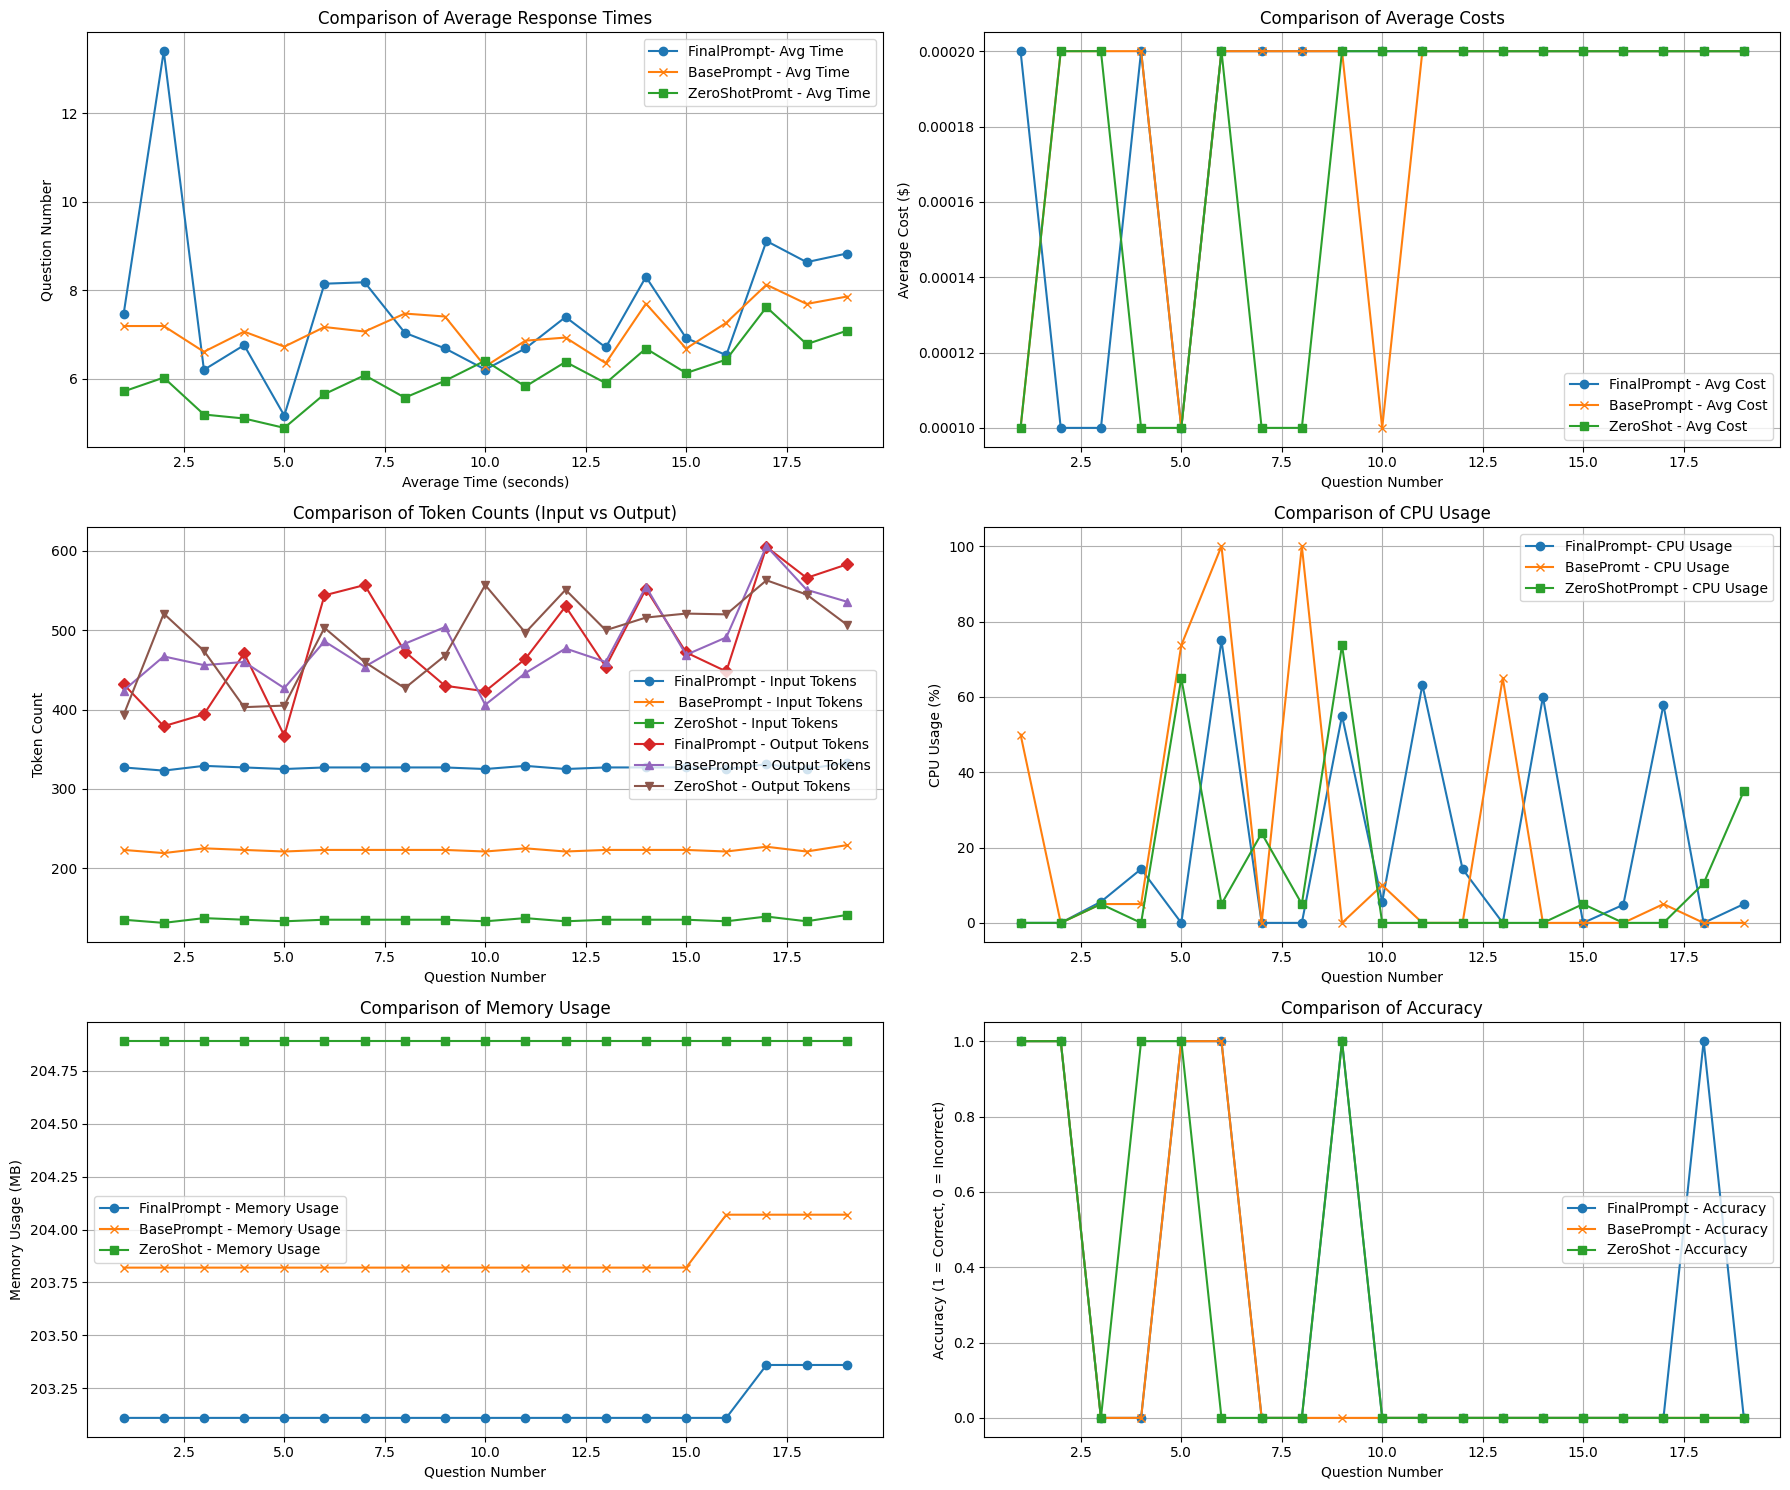

In [ ]:
import json
import matplotlib.pyplot as plt

# Load the results from JSON files
def load_results(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Extract relevant data for plotting
def extract_data(results):
    question_numbers = [result['question_number'] for result in results]
    avg_times = [result['Response Time (s)'] for result in results]
    avg_costs = [result.get('Total Cost ($)', 0) for result in results]  # Default to 0 if cost is unavailable
    accuracy = [result['Accuracy (%)'] for result in results]
    token_counts_input = [result['Input Tokens'] for result in results]
    token_counts_output = [result['Output Tokens'] for result in results]
    cpu_usages = [result['CPU Usage (%)'] for result in results]
    memory_usages = [result['Memory Usage (MB)'] for result in results]
    return question_numbers, avg_times, avg_costs, accuracy, token_counts_input, token_counts_output, cpu_usages, memory_usages

# File paths for the three tests
file_path_1 = '/content/Finalprompt_gemini_cost_token_accuracy_solution19.json'
file_path_2 = '/content/performance_gemini_cost_token_accuracy_solution19.json'
file_path_3 = '/content/zeroshotprompt_gemini_cost_token_accuracy_solution19.json'
# Load data from the three JSON files
FinalPrompt_results = load_results(file_path_1)
BasePrompt_results = load_results(file_path_2)
ZeroshotPrompt_results = load_results(file_path_3)

# Extract data for all three tests
questions_1, avg_times_1, avg_costs_1, accuracy_1, token_counts_input_1, token_counts_output_1, cpu_usages_1, memory_usages_1 = extract_data(FinalPrompt_results)
questions_2, avg_times_2, avg_costs_2, accuracy_2, token_counts_input_2, token_counts_output_2, cpu_usages_2, memory_usages_2 = extract_data(BasePrompt_results)
questions_3, avg_times_3, avg_costs_3, accuracy_3, token_counts_input_3, token_counts_output_3, cpu_usages_3, memory_usages_3 = extract_data(ZeroshotPrompt_results)

# Plot comparison of average response times, costs, token counts, CPU and Memory usage
plt.figure(figsize=(18, 15))

# Plotting average response times
plt.subplot(3, 2, 1)
plt.plot(questions_1, avg_times_1, label="FinalPrompt- Avg Time", marker='o')
plt.plot(questions_2, avg_times_2, label="BasePrompt - Avg Time", marker='x')
plt.plot(questions_3, avg_times_3, label="ZeroShotPromt - Avg Time", marker='s')
plt.title('Comparison of Average Response Times')
plt.xlabel('Average Time (seconds)')
plt.ylabel('Question Number')
plt.legend()
plt.grid(True)

# Plotting average costs
plt.subplot(3, 2, 2)
plt.plot(questions_1, avg_costs_1, label="FinalPrompt - Avg Cost", marker='o')
plt.plot(questions_2, avg_costs_2, label="BasePrompt - Avg Cost", marker='x')
plt.plot(questions_3, avg_costs_3, label="ZeroShot - Avg Cost", marker='s')
plt.title('Comparison of Average Costs')
plt.xlabel('Question Number')
plt.ylabel('Average Cost ($)')
plt.legend()
plt.grid(True)

# Plotting token counts (input vs output)
plt.subplot(3, 2, 3)
plt.plot(questions_1, token_counts_input_1, label="FinalPrompt - Input Tokens", marker='o')
plt.plot(questions_2, token_counts_input_2, label=" BasePrompt - Input Tokens", marker='x')
plt.plot(questions_3, token_counts_input_3, label="ZeroShot - Input Tokens", marker='s')
plt.plot(questions_1, token_counts_output_1, label="FinalPrompt - Output Tokens", marker='D')
plt.plot(questions_2, token_counts_output_2, label="BasePrompt - Output Tokens", marker='^')
plt.plot(questions_3, token_counts_output_3, label="ZeroShot - Output Tokens", marker='v')
plt.title('Comparison of Token Counts (Input vs Output)')
plt.xlabel('Question Number')
plt.ylabel('Token Count')
plt.legend()
plt.grid(True)

# Plotting CPU usage
plt.subplot(3, 2, 4)
plt.plot(questions_1, cpu_usages_1, label="FinalPrompt- CPU Usage", marker='o')
plt.plot(questions_2, cpu_usages_2, label="BasePromt - CPU Usage", marker='x')
plt.plot(questions_3, cpu_usages_3, label="ZeroShotPrompt - CPU Usage", marker='s')
plt.title('Comparison of CPU Usage')
plt.xlabel('Question Number')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.grid(True)

# Plotting memory usage
plt.subplot(3, 2, 5)
plt.plot(questions_1, memory_usages_1, label="FinalPrompt - Memory Usage", marker='o')
plt.plot(questions_2, memory_usages_2, label="BasePrompt - Memory Usage", marker='x')
plt.plot(questions_3, memory_usages_3, label="ZeroShot - Memory Usage", marker='s')
plt.title('Comparison of Memory Usage')
plt.xlabel('Question Number')
plt.ylabel('Memory Usage (MB)')
plt.legend()
plt.grid(True)

# Plotting accuracy comparison
plt.subplot(3, 2, 6)
plt.plot(questions_1, [1 if acc == 'Correct' else 0 for acc in accuracy_1], label="FinalPrompt - Accuracy", marker='o')
plt.plot(questions_2, [1 if acc == 'Correct' else 0 for acc in accuracy_2], label="BasePrompt - Accuracy", marker='x')
plt.plot(questions_3, [1 if acc == 'Correct' else 0 for acc in accuracy_3], label="ZeroShot - Accuracy", marker='s')
plt.title('Comparison of Accuracy')
plt.xlabel('Question Number')
plt.ylabel('Accuracy (1 = Correct, 0 = Incorrect)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


for problem generation

In [ ]:
import time
import google.generativeai as genai
import statistics
import json
import psutil
import tiktoken
import pandas as pd

# Initialize Gemini client
genai.configure(api_key="")

# Initialize the Gemini client
def initialize_gemini():
    # Initialize the model (ensure 'gemini-1.5-flash' is the correct model name)
    return genai.GenerativeModel("gemini-1.5-flash")

# Base prompt template (unchanged)
base_prompt = """
Given the following algebra MCQ: {question}
 Generate 4 new, unique algebra MCQs that are conceptually similar but numerically different. Each MCQ should have the same structure and difficulty level as the original. Ensure each new MCQ has one correct answer and three incorrect options.
      *Constraints:*
          * The generated MCQs must be mathematically correct and solvable.
          * The incorrect options should be plausible distractors, not obviously wrong.
          * The level of difficulty should be consistent with the original MCQ
"""

# Set of algebraic questions
questions = [
    "Solve the equation: 2x + 3 = 11.",
    "Simplify the expression: 3(2x + 5) = 21.",
    "Factorize the quadratic: x^2 + 5x + 6 = 0.",
    "Solve the inequality: 3x - 7 > 5.",
    "Find the slope and intercept of the line: y = 2x + 3."
]


def calculate_tokens(prompt, response):
    return len(prompt.split()), len(response.split())

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

# Updated query function to use the Gemini model
def query_gemini(prompt):
    start_time = time.time()
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    end_time = time.time()
    response_time = end_time - start_time
    output = response.text  # Assuming response.text gives the result
    return output, response_time

# Define pricing structure (may be similar for Gemini, adjust if needed)
# Updated Pricing Structure Based on Gemini API's Free Tier and Pay-as-you-go Model
PRICING = {
    "free_tier_input": 0.00,  # Free for input tokens in the free tier
    "free_tier_output": 0.00,  # Free for output tokens in the free tier
    "pay_as_you_go_input": 0.075 / 1_000_000,  # $0.075 per million input tokens
    "pay_as_you_go_output": 0.30 / 1_000_000,  # $0.30 per million output tokens
    "context_caching": 0.01875 / 1_000_000,  # $0.01875 per million tokens for context caching
    "tuning": 0.00,  # Free for tuning
}

# Function to calculate cost based on tier (pay-as-you-go)
def calculate_cost(token_count_input, token_count_output, tier="pay_as_you_go"):
    if tier == "pay_as_you_go":
        # Calculate cost for pay-as-you-go tier
        input_cost = token_count_input * PRICING["pay_as_you_go_input"]
        output_cost = token_count_output * PRICING["pay_as_you_go_output"]
    else:
        raise ValueError("Invalid tier specified. Please choose 'pay_as_you_go'.")

    return input_cost, output_cost, input_cost + output_cost




def performance_test(questions):
    results = []
    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)

        # Query Gemini
        response, response_time = query_gemini(prompt)

        # Calculate tokens
        token_count_input, token_count_output = calculate_tokens(prompt, response)

        # Calculate cost for pay-as-you-go tier
        input_cost, output_cost, total_cost = calculate_cost(token_count_input, token_count_output)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Calculate accuracy based on solution comparison
        accuracy = evaluate_accuracy(response, question)

        # Store result
        results.append({
            "question_number": idx + 1,
            "Question": question,
            "Response Time (s)": round(response_time, 4),
            "Input Tokens": token_count_input,
            "Output Tokens": token_count_output,
            "Input Cost ($)": round(input_cost, 4),
            "Output Cost ($)": round(output_cost, 4),
            "Total Cost ($)": round(total_cost, 4),
            "CPU Usage (%)": cpu_usage,
            "Memory Usage (MB)": round(memory_usage, 2),
            "Response": response,

        })
        print(f"Question {idx + 1}: {question}")
        print(f"Response Time: {response_time:.4f} seconds")
        print(f"Input Tokens: {token_count_input}")
        print(f"Output Tokens: {token_count_output}")
        print(f"Input Cost: ${input_cost:.4f}")
        print(f"Output Cost: ${output_cost:.4f}")
        print(f"Total Cost: ${total_cost:.4f}")
        print(f"CPU Usage: {cpu_usage:.2f}%")
        print(f"Memory Usage: {memory_usage:.2f} MB")

        print("-" * 50)

    # Convert results to a DataFrame
    df_results = pd.DataFrame(results)
    print("\nPerformance Results:")
    print(df_results)

    # Save results to JSON
    file_name = "Similarquestionperformance_gemini_cost_token_accuracy_solution.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)
    print(f"\nResults saved to {file_name}")
    return df_results


if __name__ == "__main__":
    performance_test(questions)



Processing Question 1/5...
Question 1: Solve the equation: 2x + 3 = 11.
Response Time: 3.2055 seconds
Input Tokens: 85
Output Tokens: 167
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0001
CPU Usage: 50.00%
Memory Usage: 238.51 MB
Accuracy: No expected solution available
--------------------------------------------------

Processing Question 2/5...
Question 2: Simplify the expression: 3(2x + 5) = 21.
Response Time: 3.1749 seconds
Input Tokens: 85
Output Tokens: 201
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0001
CPU Usage: 0.00%
Memory Usage: 238.51 MB
Accuracy: No expected solution available
--------------------------------------------------

Processing Question 3/5...
Question 3: Factorize the quadratic: x^2 + 5x + 6 = 0.
Response Time: 4.2817 seconds
Input Tokens: 87
Output Tokens: 261
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0001
CPU Usage: 42.10%
Memory Usage: 238.51 MB
Accuracy: No expected solution available
--------------------------------

In [ ]:
import time
import google.generativeai as genai
import statistics
import json
import psutil
import tiktoken
import pandas as pd

# Initialize Gemini client
genai.configure(api_key="")

# Initialize the Gemini client
def initialize_gemini():
    # Initialize the model (ensure 'gemini-1.5-flash' is the correct model name)
    return genai.GenerativeModel("gemini-1.5-flash")

# Base prompt template (unchanged)
base_prompt = """
Given the following algebra MCQ: {question}
 Generate 4 new, unique algebra MCQs that are conceptually similar but numerically different. Each MCQ should have the same structure and difficulty level as the original. Ensure each new MCQ has one correct answer and three incorrect options.
      *Constraints:*
          * The generated MCQs must be mathematically correct and solvable.
          * The incorrect options should be plausible distractors, not obviously wrong.
          * The level of difficulty should be consistent with the original MCQ
"""

# Set of algebraic questions
questions = [
    "4x + 3 = 2x + 9",
    "5x² = 3x",
    "50 - x² = 25 - x - x²",
    "x² - 11x - 12 = 0",
    "x² + 10x = 0",
    "3(3x + 5) + 6 = 3",
    "(y + 2)² = y² + 13",
    "8x² - 2x - 3 = 0",
    "3x² + 27x + 42 = 0",
    "2x - 9 = x/4",
    "(a + 2)(a - 4) = (a + 3)²",
    "6x² = x + 2",
    "(x - 3)(x + 5) = -16",
    "(b + 5)² = (b + 1)²",
    "x³ - 6x² + 8x = 0",
    "4x(x + 1) = 3",
    "(2y + 3)² = (y + 1)(y - 3) + 3y²",
    "-2x² = -8x + 6",
    "(5m + 2)² - 1 = (m - 3)(m + 5) + 24m²"
]


# Function to calculate token usage (modify based on Gemini's token calculation logic if different)
def calculate_tokens(prompt, response):
    return len(prompt.split()), len(response.split())

# Function to measure CPU and memory usage
def measure_system_usage():
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory_info = process.memory_info()
    memory_usage = memory_info.rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

# Updated query function to use the Gemini model
def query_gemini(prompt):
    start_time = time.time()
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    end_time = time.time()
    response_time = end_time - start_time
    output = response.text  # Assuming response.text gives the result
    return output, response_time

# Define pricing structure (may be similar for Gemini, adjust if needed)
# Updated Pricing Structure Based on Gemini API's Free Tier and Pay-as-you-go Model
PRICING = {
    "free_tier_input": 0.00,  # Free for input tokens in the free tier
    "free_tier_output": 0.00,  # Free for output tokens in the free tier
    "pay_as_you_go_input": 0.075 / 1_000_000,  # $0.075 per million input tokens
    "pay_as_you_go_output": 0.30 / 1_000_000,  # $0.30 per million output tokens
    "context_caching": 0.01875 / 1_000_000,  # $0.01875 per million tokens for context caching
    "tuning": 0.00,  # Free for tuning
}

# Function to calculate cost based on tier (pay-as-you-go)
def calculate_cost(token_count_input, token_count_output, tier="pay_as_you_go"):
    if tier == "pay_as_you_go":
        # Calculate cost for pay-as-you-go tier
        input_cost = token_count_input * PRICING["pay_as_you_go_input"]
        output_cost = token_count_output * PRICING["pay_as_you_go_output"]
    else:
        raise ValueError("Invalid tier specified. Please choose 'pay_as_you_go'.")

    return input_cost, output_cost, input_cost + output_cost




def performance_test(questions):
    results = []
    for idx, question in enumerate(questions):
        print(f"\nProcessing Question {idx + 1}/{len(questions)}...")
        prompt = base_prompt.format(question=question)


        response, response_time = query_gemini(prompt)

        # Calculate tokens
        token_count_input, token_count_output = calculate_tokens(prompt, response)

        # Calculate cost for pay-as-you-go tier
        input_cost, output_cost, total_cost = calculate_cost(token_count_input, token_count_output)

        # Measure system usage
        cpu_usage, memory_usage = measure_system_usage()

        # Calculate accuracy based on solution comparison
        accuracy = evaluate_accuracy(response, question)

        # Store result
        results.append({
            "question_number": idx + 1,
            "Question": question,
            "Response Time (s)": round(response_time, 4),
            "Input Tokens": token_count_input,
            "Output Tokens": token_count_output,
            "Input Cost ($)": round(input_cost, 4),
            "Output Cost ($)": round(output_cost, 4),
            "Total Cost ($)": round(total_cost, 4),
            "CPU Usage (%)": cpu_usage,
            "Memory Usage (MB)": round(memory_usage, 2),
            "Response": response,

        })
        print(f"Question {idx + 1}: {question}")
        print(f"Response Time: {response_time:.4f} seconds")
        print(f"Input Tokens: {token_count_input}")
        print(f"Output Tokens: {token_count_output}")
        print(f"Input Cost: ${input_cost:.4f}")
        print(f"Output Cost: ${output_cost:.4f}")
        print(f"Total Cost: ${total_cost:.4f}")
        print(f"CPU Usage: {cpu_usage:.2f}%")
        print(f"Memory Usage: {memory_usage:.2f} MB")

        print("-" * 50)

    # Convert results to a DataFrame
    df_results = pd.DataFrame(results)
    print("\nPerformance Results:")
    print(df_results)

    # Save results to JSON
    file_name = "Similarquestionperformance_gemini_cost_token_solution19.json"
    with open(file_name, "w") as file:
        json.dump(results, file, indent=4)
    print(f"\nResults saved to {file_name}")
    return df_results

# Run performance test with accuracy based on solution comparison
if __name__ == "__main__":
    performance_test(questions)



Processing Question 1/19...
Question 1: 4x + 3 = 2x + 9
Response Time: 3.7649 seconds
Input Tokens: 84
Output Tokens: 187
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0001
CPU Usage: 50.00%
Memory Usage: 238.77 MB
--------------------------------------------------

Processing Question 2/19...
Question 2: 5x² = 3x
Response Time: 3.6335 seconds
Input Tokens: 80
Output Tokens: 241
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0001
CPU Usage: 0.00%
Memory Usage: 238.77 MB
--------------------------------------------------

Processing Question 3/19...
Question 3: 50 - x² = 25 - x - x²
Response Time: 3.1150 seconds
Input Tokens: 86
Output Tokens: 189
Input Cost: $0.0000
Output Cost: $0.0001
Total Cost: $0.0001
CPU Usage: 52.60%
Memory Usage: 238.77 MB
--------------------------------------------------

Processing Question 4/19...
Question 4: x² - 11x - 12 = 0
Response Time: 3.6548 seconds
Input Tokens: 84
Output Tokens: 248
Input Cost: $0.0000
Output Cost: $0.0001
Total

In [ ]:
pip install matplotlib

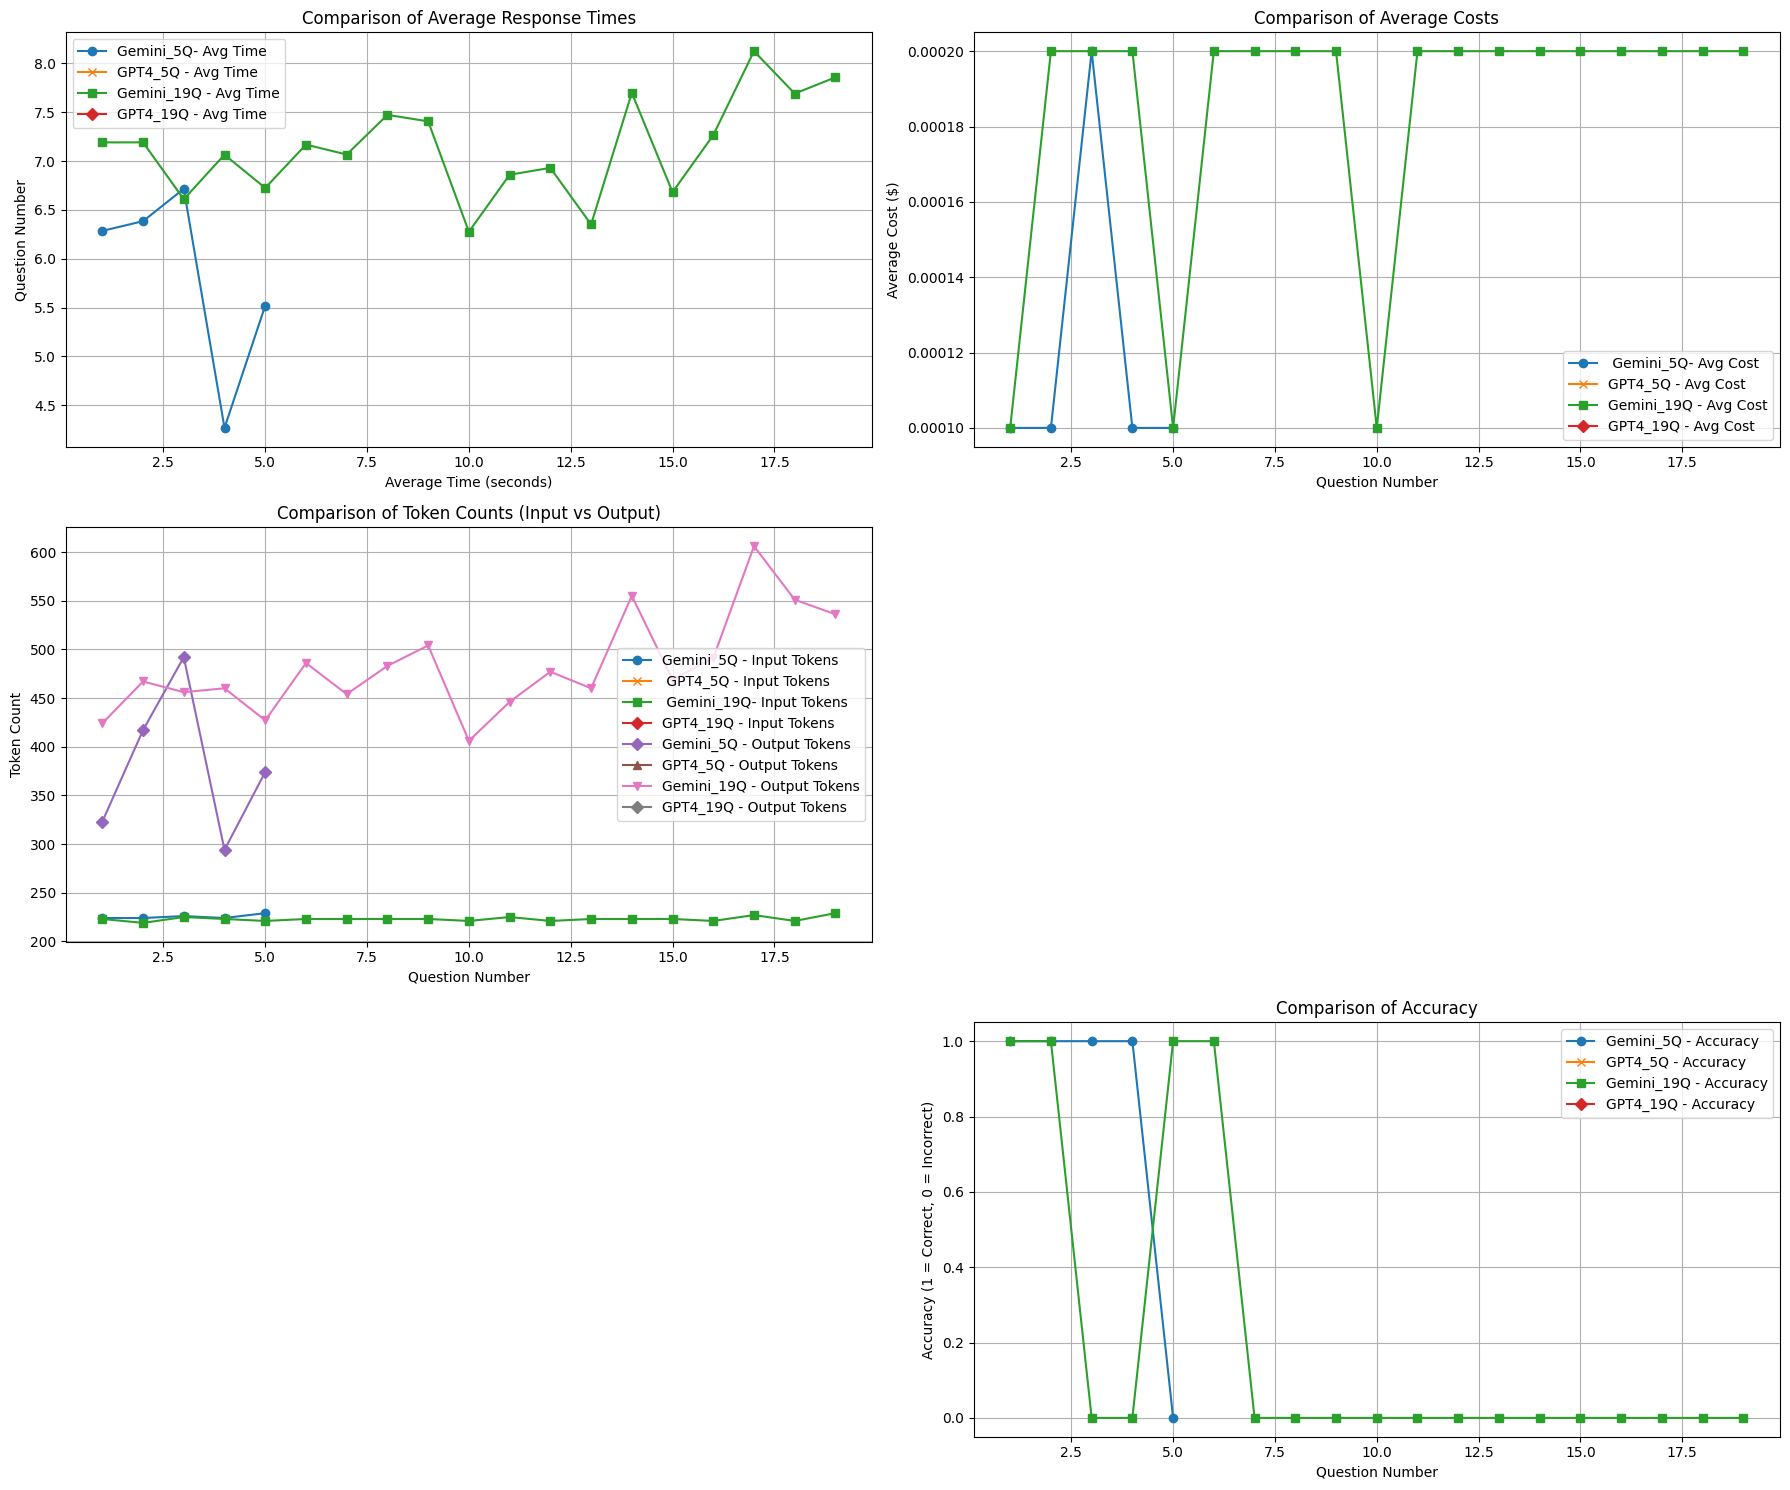

In [ ]:
import json
import matplotlib.pyplot as plt

def load_results(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def extract_data(results):
    question_numbers = [result['question_number'] for result in results]
    avg_times = [result['Response Time (s)'] for result in results]
    avg_costs = [result.get('Total Cost ($)', 0) for result in results]  # Default to 0 if cost is unavailable
    accuracy = [result['Accuracy (%)'] for result in results]
    token_counts_input = [result['Input Tokens'] for result in results]
    token_counts_output = [result['Output Tokens'] for result in results]
    cpu_usages = [result['CPU Usage (%)'] for result in results]
    memory_usages = [result['Memory Usage (MB)'] for result in results]
    return question_numbers, avg_times, avg_costs, accuracy, token_counts_input, token_counts_output, cpu_usages, memory_usages

file_path_1 = '/content/performance_gemini_cost_token_accuracy_solution(1).json'
file_path_2 = '/content/performance_gpt4_cost_token_accuracy_solution.json'
file_path_3 = '/content/performance_gemini_cost_token_accuracy_solution19.json'
file_path_4 = '/content/performance_with_19q_gpt-4_withDiagram.json'


Gemini_5Q_results = load_results(file_path_1)
GPT4_5Q_results = load_results(file_path_2)
Gemini_19Q_results = load_results(file_path_3)
GPT4_5Q_results = load_results(file_path_4)


questions_1, avg_times_1, avg_costs_1, accuracy_1, token_counts_input_1, token_counts_output_1, cpu_usages_1, memory_usages_1 = extract_data(Gemini_5Q_results)
questions_2, avg_times_2, avg_costs_2, accuracy_2, token_counts_input_2, token_counts_output_2, cpu_usages_2, memory_usages_2 = extract_data(GPT4_5Q_results)
questions_3, avg_times_3, avg_costs_3, accuracy_3, token_counts_input_3, token_counts_output_3, cpu_usages_3, memory_usages_3 = extract_data(Gemini_19Q_results)
questions_4, avg_times_4, avg_costs_4, accuracy_4, token_counts_input_4, token_counts_output_4, cpu_usages_4, memory_usages_4 = extract_data(GPT4_5Q_results)

plt.figure(figsize=(18, 15))


plt.subplot(3, 2, 1)
plt.plot(questions_1, avg_times_1, label="Gemini_5Q- Avg Time", marker='o')
plt.plot(questions_2, avg_times_2, label="GPT4_5Q - Avg Time", marker='x')
plt.plot(questions_3, avg_times_3, label="Gemini_19Q - Avg Time", marker='s')
plt.plot(questions_4, avg_times_4, label="GPT4_19Q - Avg Time", marker='D')
plt.title('Comparison of Average Response Times')
plt.xlabel('Average Time (seconds)')
plt.ylabel('Question Number')
plt.legend()
plt.grid(True)

# Plotting average costs
plt.subplot(3, 2, 2)
plt.plot(questions_1, avg_costs_1, label=" Gemini_5Q- Avg Cost", marker='o')
plt.plot(questions_2, avg_costs_2, label="GPT4_5Q - Avg Cost", marker='x')
plt.plot(questions_3, avg_costs_3, label="Gemini_19Q - Avg Cost", marker='s')
plt.plot(questions_4, avg_costs_4, label="GPT4_19Q - Avg Cost", marker='D')
plt.title('Comparison of Average Costs')
plt.xlabel('Question Number')
plt.ylabel('Average Cost ($)')
plt.legend()
plt.grid(True)

# Plotting token counts (input vs output)
plt.subplot(3, 2, 3)
plt.plot(questions_1, token_counts_input_1, label="Gemini_5Q - Input Tokens", marker='o')
plt.plot(questions_2, token_counts_input_2, label=" GPT4_5Q - Input Tokens", marker='x')
plt.plot(questions_3, token_counts_input_3, label=" Gemini_19Q- Input Tokens", marker='s')
plt.plot(questions_4, token_counts_input_4, label="GPT4_19Q - Input Tokens", marker='D')
plt.plot(questions_1, token_counts_output_1, label="Gemini_5Q - Output Tokens", marker='D')
plt.plot(questions_2, token_counts_output_2, label="GPT4_5Q - Output Tokens", marker='^')
plt.plot(questions_3, token_counts_output_3, label="Gemini_19Q - Output Tokens", marker='v')
plt.plot(questions_4, token_counts_output_4, label="GPT4_19Q - Output Tokens", marker='D')
plt.title('Comparison of Token Counts (Input vs Output)')
plt.xlabel('Question Number')
plt.ylabel('Token Count')
plt.legend()
plt.grid(True)



# Plotting accuracy comparison
plt.subplot(3, 2, 6)
plt.plot(questions_1, [1 if acc == 'Correct' else 0 for acc in accuracy_1], label="Gemini_5Q - Accuracy", marker='o')
plt.plot(questions_2, [1 if acc == 'Correct' else 0 for acc in accuracy_2], label="GPT4_5Q - Accuracy", marker='x')
plt.plot(questions_3, [1 if acc == 'Correct' else 0 for acc in accuracy_3], label="Gemini_19Q - Accuracy", marker='s')
plt.plot(questions_4, [1 if acc == 'Correct' else 0 for acc in accuracy_4], label="GPT4_19Q - Accuracy", marker='D')
plt.title('Comparison of Accuracy')
plt.xlabel('Question Number')
plt.ylabel('Accuracy (1 = Correct, 0 = Incorrect)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
